# **$$        Flight\ Price\ Dataset$$**

##### **Step.01 -    `Importig Libraries and Reading the Dataset` :-**

In [82]:
# Importing Libraries 
import pandas as pd
import re
import calendar
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import io
from IPython.display import Image
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Read the Dataset using pandas
Flight_Price_Dataset =  pd.read_excel("flight_price.xlsx")
# Display frist 5 data of the dataset as a sample 
display(Flight_Price_Dataset.head())

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


##### **Step.02 -    `Checking Dataset` and `Modify` it As per required:-**

-    **Checking `Shape`, `Missing Value`, `Duplicates Value`, Segrregate `Numerical Features` or `Categorical Features`, `Summary` and `Descriptive Summary` of Dataset :**

In [83]:
## Check Shape
Flight_Price_shape = Flight_Price_Dataset.shape
print(f"Shape (Rows, Column) :- {Flight_Price_shape}")


## Check Missing Value
# Columns which has null values
Flight_Price_missing_value = Flight_Price_Dataset.isnull().sum()
print("\nMissing Values (Column wise) :-")
display(Flight_Price_missing_value)


## Check Duplicates
Flight_Price_duplicates = Flight_Price_Dataset.duplicated().sum()
print(f"\nNumber of duplicates :- {Flight_Price_duplicates}")


## Segrregate Numerical and Categorical features
Flight_Price_numerical_features=[feature for feature in Flight_Price_Dataset.columns if Flight_Price_Dataset[feature].dtype!='O']
Flight_Price_categorical_feature=[feature for feature in Flight_Price_Dataset.columns if Flight_Price_Dataset[feature].dtype=='O']
print(f"\nNumerical Features: {Flight_Price_numerical_features}")
print(f"\nCategorical Feature: {Flight_Price_categorical_feature}")


## Check Summary
# Capture the output of df.info() as a string
Flight_Price_summary_buffer = io.StringIO()
Flight_Price_Dataset.info(buf=Flight_Price_summary_buffer)
Flight_Price_summary_str = Flight_Price_summary_buffer.getvalue()
# Close the buffer
Flight_Price_summary_buffer.close()
# Now, output_str contains the info() output as a string
print("\nSummary :-")
print(Flight_Price_summary_str)


## Check Descriptive Summary
Flight_Price_descriptive_summary =Flight_Price_Dataset.describe().T
print("\nDescriptive Statistics:-")
display(Flight_Price_descriptive_summary)


## Check Mis-Spaced
Flight_Price_mis_spaced_columns = [col for col in Flight_Price_Dataset.columns if ' ' in col]

if Flight_Price_mis_spaced_columns:
    print("\nMis-spaced column names :-")
    for col in Flight_Price_mis_spaced_columns:
        print(f"'{col}'")
else:
    print("\nNo mis-spaced column names found.")


## Check No. of Unique Value
print("\nTotal No. of Unique Value for each Columns :-")
for col_name in Flight_Price_Dataset.columns:
    Flight_Price_No_unique_value = len(Flight_Price_Dataset[col_name].unique())
    print(F"{col_name} = {Flight_Price_No_unique_value}")

Shape (Rows, Column) :- (10683, 11)

Missing Values (Column wise) :-


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


Number of duplicates :- 220

Numerical Features: ['Price']

Categorical Feature: ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']

Summary :-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Descriptive Statis

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0



No mis-spaced column names found.

Total No. of Unique Value for each Columns :-
Airline = 12
Date_of_Journey = 44
Source = 5
Destination = 6
Route = 129
Dep_Time = 222
Arrival_Time = 1343
Duration = 368
Total_Stops = 6
Additional_Info = 10
Price = 1870


1. **Date_of_Journey Features**

In [84]:
Flight_Price_Dataset['Dep_Date'] = Flight_Price_Dataset['Date_of_Journey'].str.split('/').str[0]
Flight_Price_Dataset['Dep_Month'] = Flight_Price_Dataset['Date_of_Journey'].str.split('/').str[1]
Flight_Price_Dataset['Dep_Year'] = Flight_Price_Dataset['Date_of_Journey'].str.split('/').str[2]
Flight_Price_Dataset['Dep_Date'] = Flight_Price_Dataset['Dep_Date'].astype(int)
Flight_Price_Dataset['Dep_Month'] = Flight_Price_Dataset['Dep_Month'].astype(int)
Flight_Price_Dataset['Dep_Year'] = Flight_Price_Dataset['Dep_Year'].astype(int)
Flight_Price_Dataset.drop('Date_of_Journey',axis=1,inplace=True)

2. **Source Features**

In [85]:
Flight_Price_Dataset.rename(columns={'Source': 'Source (From.)'}, inplace=True)

3. **Destination Features**

In [86]:
Flight_Price_Dataset.rename(columns={'Destination': 'Destination (To.)'}, inplace=True)

4. **Route Features**

In [87]:
Flight_Price_Dataset.drop('Route',axis=1,inplace=True)

5. **Dep_Time Features**

In [88]:
Flight_Price_Dataset['Boarding_Hours'] = Flight_Price_Dataset['Dep_Time'].str.split(' ').str[0].str.split(':').str[0]
Flight_Price_Dataset['Boarding_Minutes'] = Flight_Price_Dataset['Dep_Time'].str.split(' ').str[0].str.split(':').str[1]
Flight_Price_Dataset['Boarding_Hours']=Flight_Price_Dataset['Boarding_Hours'].astype(int)
Flight_Price_Dataset['Boarding_Minutes']=Flight_Price_Dataset['Boarding_Minutes'].astype(int)
Flight_Price_Dataset.drop('Dep_Time',axis=1,inplace=True)

6. **Arrival_Time Features**

In [89]:
Flight_Price_Dataset['Arrival_Hours'] = Flight_Price_Dataset['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
Flight_Price_Dataset['Arrival_Minutes'] = Flight_Price_Dataset['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]
Flight_Price_Dataset['Arrival_Hours']=Flight_Price_Dataset['Arrival_Hours'].astype(int)
Flight_Price_Dataset['Arrival_Minutes']=Flight_Price_Dataset['Arrival_Minutes'].astype(int)
Flight_Price_Dataset.drop('Arrival_Time',axis=1,inplace=True)

7. **Duration Features**

    - Add two column for `Duration_Hours`, `Duration_Minutes`.

    - After adding these two column drop `Duration`.

In [90]:
durations = Flight_Price_Dataset['Duration'].unique().tolist()

def duration_to_minutes(duration_str):
    parts = duration_str.split()
    total_minutes = 0
    for part in parts:
        if 'h' in part:
            total_minutes += int(part.replace('h', '')) * 60
        elif 'm' in part:
            total_minutes += int(part.replace('m', ''))
    return total_minutes

total_minutes_list = [duration_to_minutes(duration) for duration in durations]
odd_one_index = total_minutes_list.index(min(total_minutes_list))
display(Flight_Price_Dataset[Flight_Price_Dataset['Duration']==durations[odd_one_index]])

,Airline,Source (From.),Destination (To.),Duration,Total_Stops,Additional_Info,Price,Dep_Date,Dep_Month,Dep_Year,Boarding_Hours,Boarding_Minutes,Arrival_Hours,Arrival_Minutes
6474,Air India,Mumbai,Hyderabad,5m,2 stops,No info,17327,6,3,2019,16,50,16,55


In [91]:
Flight_Price_Dataset.drop(6474, inplace=True)

In [92]:
Flight_Price_Dataset['Duration_Hours'] = Flight_Price_Dataset['Duration'].str.split(' ').str[0].str.split('h').str[0]
Flight_Price_Dataset['Duration_Minutes'] = Flight_Price_Dataset['Duration'].str.split(' ').str[1].str.split('m').str[0]
Flight_Price_Dataset['Duration_Minutes'].fillna(0, inplace=True)
Flight_Price_Dataset['Duration_Hours']=Flight_Price_Dataset['Duration_Hours'].astype(int)
Flight_Price_Dataset['Duration_Minutes']=Flight_Price_Dataset['Duration_Minutes'].astype(int)
Flight_Price_Dataset.drop('Duration',axis=1,inplace=True)

8. **Total_Stops Features**

In [93]:
Flight_Price_Dataset['Total_Stops'] = Flight_Price_Dataset['Total_Stops'].map({
    'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4,
    np.nan:1
    })

9. **Additional_Info Features**

In [94]:
# Replace 'No Info' with 'No info' in the 'Additional_Info' column
Flight_Price_Dataset['Additional_Info'] = Flight_Price_Dataset['Additional_Info'].str.replace('No Info', 'No info')

-  **Remove `Duplicates records` of the Dataset :**

In [95]:
Flight_Price_Dataset.drop_duplicates(inplace=True)

-  **`Encode` Categorical Features of the Dataset :**

In [96]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Flight_Price_Dataset['Airline_encoded'] = le.fit_transform(Flight_Price_Dataset['Airline'])
Flight_Price_Dataset['Source_encoded'] = le.fit_transform(Flight_Price_Dataset['Source (From.)'])
Flight_Price_Dataset['Destination_encoded'] = le.fit_transform(Flight_Price_Dataset['Destination (To.)'])
Flight_Price_Dataset['Additional_Info_encoded'] = le.fit_transform(Flight_Price_Dataset['Additional_Info'])


-  **`Rearrange` columns of the Dataset :**

In [97]:
Flight_Price_Dataset = Flight_Price_Dataset[['Airline','Airline_encoded','Dep_Date','Dep_Month','Dep_Year','Source (From.)',
                                             'Source_encoded','Destination (To.)','Destination_encoded',
                                             'Boarding_Hours','Boarding_Minutes','Arrival_Hours','Arrival_Minutes',
                                             'Duration_Hours','Duration_Minutes','Total_Stops','Additional_Info',
                                             'Additional_Info_encoded','Price',]]

##### **Step.03 -    `Feature Engineering` :-**

In [98]:
# Assuming 'Dep_Month' contains numeric month values (e.g., 1 for January, 2 for February, etc.)
Flight_Price_Dataset['Month of Journey'] = Flight_Price_Dataset['Dep_Month'].apply(lambda x: calendar.month_name[x])

# Define a function to classify months into seasons
def classify_season(month):
    if 2 <= month <= 4:
        return 'Spring'
    elif 5 <= month <= 7:
        return 'Summer'
    elif 8 <= month <= 9:
        return 'Autumn'
    else:
        return 'Winter'

Flight_Price_Dataset['Season'] = Flight_Price_Dataset['Dep_Month'].apply(classify_season)

# Combine the three columns into a single datetime column
Flight_Price_Dataset['Departure_Date'] = pd.to_datetime(Flight_Price_Dataset['Dep_Year'].astype(str) + '-' +
                                                        Flight_Price_Dataset['Dep_Month'].astype(str) + '-' +
                                                        Flight_Price_Dataset['Dep_Date'].astype(str))

# Extract the day of the week and create a new column
Flight_Price_Dataset['Day_of_Week'] = Flight_Price_Dataset['Departure_Date'].dt.day_name()

Summer = Flight_Price_Dataset[Flight_Price_Dataset['Season'] == 'Summer']

Spring = Flight_Price_Dataset[Flight_Price_Dataset['Season'] == 'Spring']

# Calculate the total flight duration in minutes
Flight_Price_Dataset['Total_Duration'] = (Flight_Price_Dataset['Duration_Hours'] * 60 + Flight_Price_Dataset['Duration_Minutes'])

##### **Step.04 -    `Dataset Visualization` :-**

- **Creating a histogram plot to visualize the distribution of flight prices.**

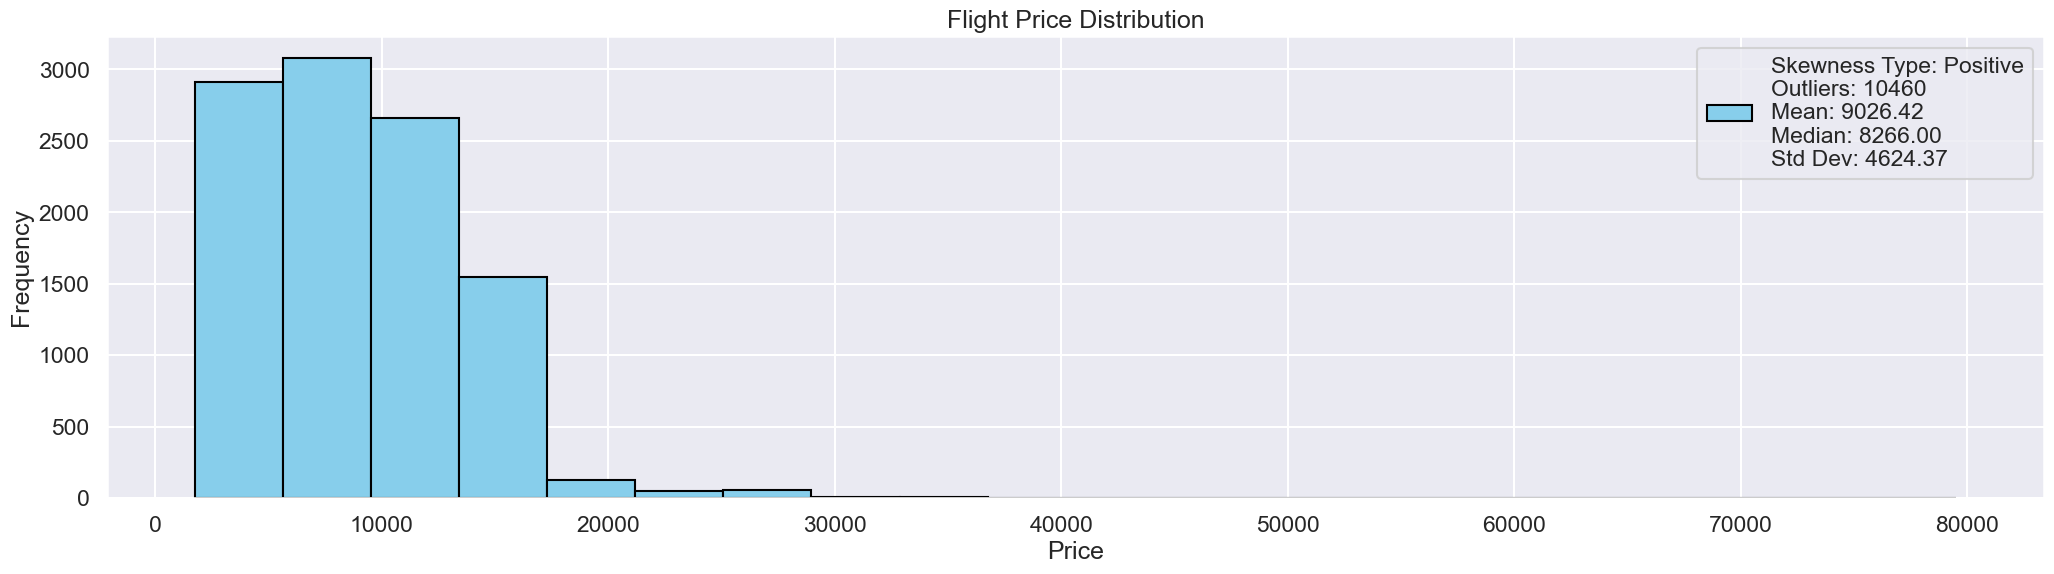

In [99]:
# Calculate skewness
Price_skewness = Flight_Price_Dataset['Price'].skew()

# Determine skewness type
Price_skewness_type = "Positive" if Price_skewness > 0 else "Negative" if Price_skewness < 0 else "No Skew"

# Identify outliers (you can adjust the threshold as needed)
Price_threshold = 2.5  # Adjust this threshold based on your data
Price_outliers = Flight_Price_Dataset[Flight_Price_Dataset['Price'] > Price_threshold]

# Summarize data (mean, median, etc.)
Price_min = Flight_Price_Dataset['Price'].min()
Price_mean = Flight_Price_Dataset['Price'].mean()
Price_median = Flight_Price_Dataset['Price'].median()
Price_std_dev = Flight_Price_Dataset['Price'].std()
Price_max = Flight_Price_Dataset['Price'].max()


plt.figure(figsize=(25, 6))  
plt.hist(Flight_Price_Dataset['Price'], bins=20, color='skyblue', edgecolor='black')

# Display skewness type and number of outliers as a legend
legend_text = f"Skewness Type: {Price_skewness_type}\nOutliers: {len(Price_outliers)}\nMean: {Price_mean:.2f}\nMedian: {Price_median:.2f}\nStd Dev: {Price_std_dev:.2f}"

# Customize the plot (add labels, title, etc.)
plt.title('Flight Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend([legend_text])
plt.show()

-  **Month-wise Boxplot of Season -**

,Summer,Spring
Best Performer,May,March
Highest Income,9028.783569,10696.39514
Skewness Type,Positive,Positive
Median,8586.0,7438.0
Q1 (25th percentile),5298.0,5117.0
Q3 (75th percentile),12192.0,12395.0
IQR (Interquartile Range),6894.0,7278.0
Upper Whisker,22533.0,23312.0
Lower Whisker,-5043.0,-5800.0


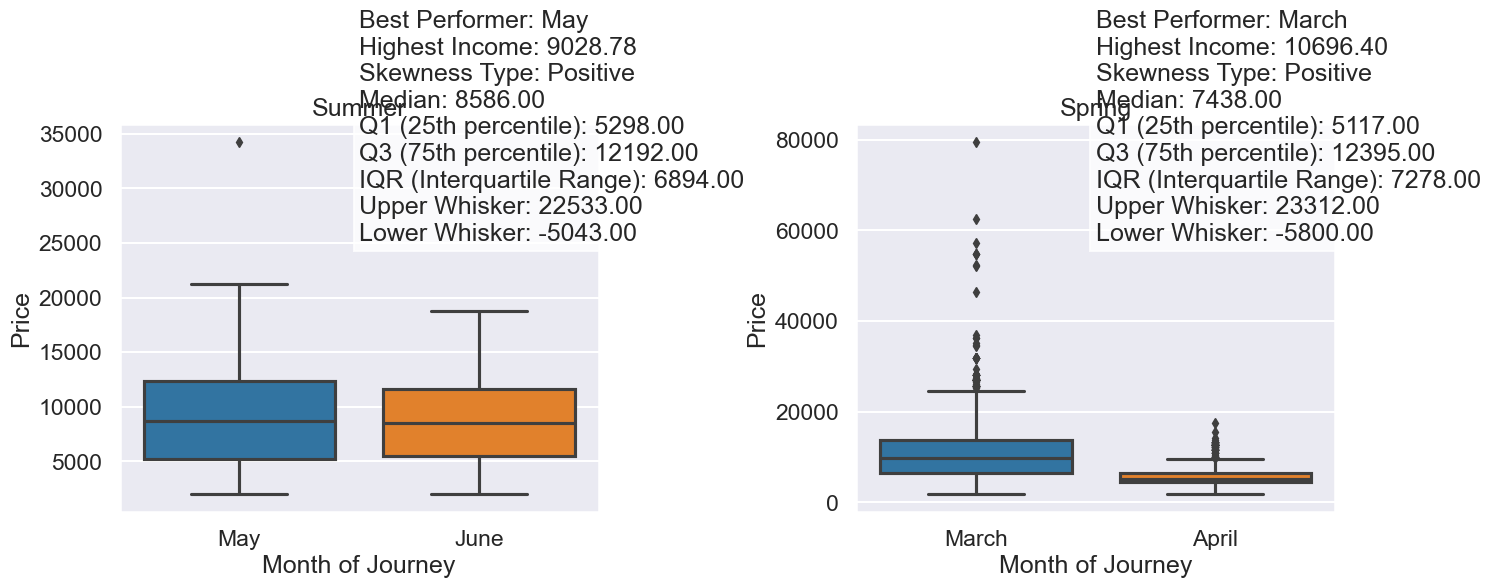

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 1 row and 2 columns, and adjust the figure size
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Calculate the mean 'average' score for each gender group and find the best performer for Summer
average_by_group_summer = Summer.groupby('Month of Journey')['Price'].mean()
best_performer_summer = average_by_group_summer.idxmax()
best_performer_score_summer = average_by_group_summer.max()
Summer_median = Summer['Price'].median()
Summer_q1 = Summer['Price'].quantile(0.25)
Summer_q3 = Summer['Price'].quantile(0.75)
Summer_iqr = Summer_q3 - Summer_q1
Summer_upper_whisker = Summer_q3 + 1.5 * Summer_iqr
Summer_lower_whisker = Summer_q1 - 1.5 * Summer_iqr
Summer_outliers = Summer[(Summer['Price'] > Summer_upper_whisker) | (Summer['Price'] < Summer_lower_whisker)]
# Calculate skewness
Summer_skewness = Summer['Price'].skew()
Summer_skewness_type = "Positive" if Summer_skewness > 0 else "Negative" if Summer_skewness < 0 else "No Skew"

# Create a boxplot for Summer and annotate it
sns.boxplot(x='Month of Journey', y='Price', data=Summer, ax=axes[0])
axes[0].set_title('Summer')
axes[0].set_xlabel('Month of Journey')
axes[0].set_ylabel('Price')
axes[0].annotate(f"Best Performer: {best_performer_summer}\nHighest Income: {best_performer_score_summer:.2f}\nSkewness Type: {Summer_skewness_type}\nMedian: {Summer_median:.2f}\nQ1 (25th percentile): {Summer_q1:.2f}\nQ3 (75th percentile): {Summer_q3:.2f}\nIQR (Interquartile Range): {Summer_iqr:.2f}\nUpper Whisker: {Summer_upper_whisker:.2f}\nLower Whisker: {Summer_lower_whisker:.2f}",
                 xy=(0.5, 0.7), xycoords='axes fraction',
                 bbox=dict(facecolor='white', alpha=0.8))

# Calculate the mean 'average' score for each gender group and find the best performer for Spring
average_by_group_spring = Spring.groupby('Month of Journey')['Price'].mean()
best_performer_spring = average_by_group_spring.idxmax()
best_performer_score_spring = average_by_group_spring.max()
Spring_median = Spring['Price'].median()
Spring_q1 = Spring['Price'].quantile(0.25)
Spring_q3 = Spring['Price'].quantile(0.75)
Spring_iqr = Spring_q3 - Spring_q1
Spring_upper_whisker = Spring_q3 + 1.5 * Spring_iqr
Spring_lower_whisker = Spring_q1 - 1.5 * Spring_iqr
Spring_outliers = Spring[(Spring['Price'] > Spring_upper_whisker) | (Spring['Price'] < Spring_lower_whisker)]
# Calculate skewness
Spring_skewness = Summer['Price'].skew()
Spring_skewness_type = "Positive" if Spring_skewness > 0 else "Negative" if Spring_skewness < 0 else "No Skew"


Seasonal_Summary = {
    'Best Performer' : [best_performer_summer,best_performer_spring],
    'Highest Income' : [best_performer_score_summer,best_performer_score_spring],
    'Skewness Type' : [Summer_skewness_type,Spring_skewness_type],
    'Median' : [Summer_median,Spring_median],
    'Q1 (25th percentile)' : [Summer_q1,Spring_q1],
    'Q3 (75th percentile)' : [Summer_q3,Spring_q3],
    'IQR (Interquartile Range)' : [Summer_iqr,Spring_iqr],
    'Upper Whisker' : [Summer_upper_whisker,Spring_upper_whisker],
    'Lower Whisker' : [Summer_lower_whisker,Spring_lower_whisker]
}
Seasonal_Summary_DF = pd.DataFrame(Seasonal_Summary, index = ['Summer', 'Spring'])
Seasonal_Summary_DF = Seasonal_Summary_DF.T
display(Seasonal_Summary_DF)


# Create a boxplot for Spring and annotate it
sns.boxplot(x='Month of Journey', y='Price', data=Spring, ax=axes[1])
axes[1].set_title('Spring')
axes[1].set_xlabel('Month of Journey')
axes[1].set_ylabel('Price')
axes[1].annotate(f"Best Performer: {best_performer_spring}\nHighest Income: {best_performer_score_spring:.2f}\nSkewness Type: {Spring_skewness_type}\nMedian: {Spring_median:.2f}\nQ1 (25th percentile): {Spring_q1:.2f}\nQ3 (75th percentile): {Spring_q3:.2f}\nIQR (Interquartile Range): {Spring_iqr:.2f}\nUpper Whisker: {Spring_upper_whisker:.2f}\nLower Whisker: {Spring_lower_whisker:.2f}",
                 xy=(0.5, 0.7), xycoords='axes fraction',
                 bbox=dict(facecolor='white', alpha=0.8))

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


- **Barplot for Average Ticket Prices by Source -**

,Source (From.),Average Price,No. of Passenger,Total Revenue
0,Banglore,8024.689940,2177,17469750
1,Chennai,4789.892388,381,1824949
2,Delhi,10460.914634,4346,45463135
3,Kolkata,9143.083566,2860,26149219
4,Mumbai,5042.083333,696,3509290


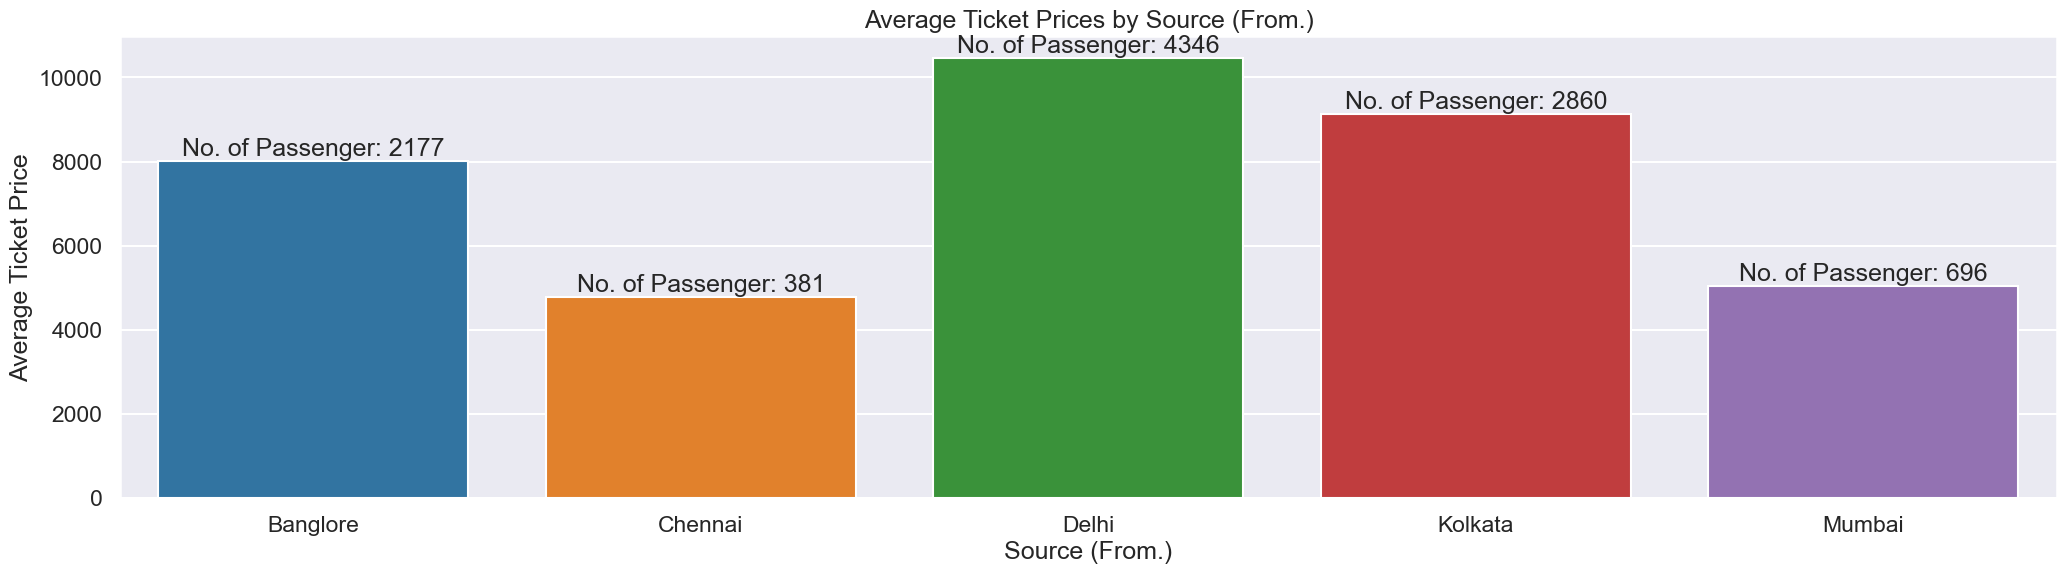

In [101]:
# Assuming Flight_Price_Dataset is your DataFrame
Source_avg_prices = Flight_Price_Dataset.groupby('Source (From.)')['Price'].mean().reset_index()
# Group the data by destination and count the number of data points
Source_data_counts = Flight_Price_Dataset['Source (From.)'].value_counts().reset_index()
Source_data_counts.columns = ['Source (From.)', 'Data Count']
# Merge the average prices and data counts DataFrames
Source_combined = Source_avg_prices.merge(Source_data_counts, on='Source (From.)')

Source_total_revenue = Flight_Price_Dataset.groupby('Source (From.)')['Price'].sum()
Source_combined = Source_combined.merge(Source_total_revenue, on='Source (From.)')
# Create a dictionary to specify the column name changes
Source_column_name_changes = {'Source (From.)': 'Source (From.)', 'Price_x': 'Average Price', 'Data Count' : 'No. of Passenger','Price_y' : 'Total Revenue'}
# Use rename() to apply the column name changes
Source_combined = Source_combined.rename(columns=Source_column_name_changes)

display(Source_combined)


# Create a barplot to visualize average ticket prices by destination
plt.figure(figsize=(25, 6))
sns.barplot(x='Source (From.)', y='Average Price', data=Source_combined)
plt.title('Average Ticket Prices by Source (From.)')
plt.xlabel('Source (From.)')
plt.ylabel('Average Ticket Price')
# Annotate the bars with data point counts
for index, row in Source_combined.iterrows():
    plt.text(index, row['Average Price'], f'No. of Passenger: {row["No. of Passenger"]}', ha='center', va='bottom')

# Show the plot
plt.show()


- **Barplot for Average Ticket Prices by Destination -**

,Destination (To.),Average Price,No. of Passenger,Total Revenue
0,Banglore,9143.083566,2860,26149219
1,Cochin,10460.914634,4346,45463135
2,Delhi,5143.918577,1265,6507057
3,Hyderabad,5042.083333,696,3509290
4,Kolkata,4789.892388,381,1824949
5,New Delhi,12020.496711,912,10962693


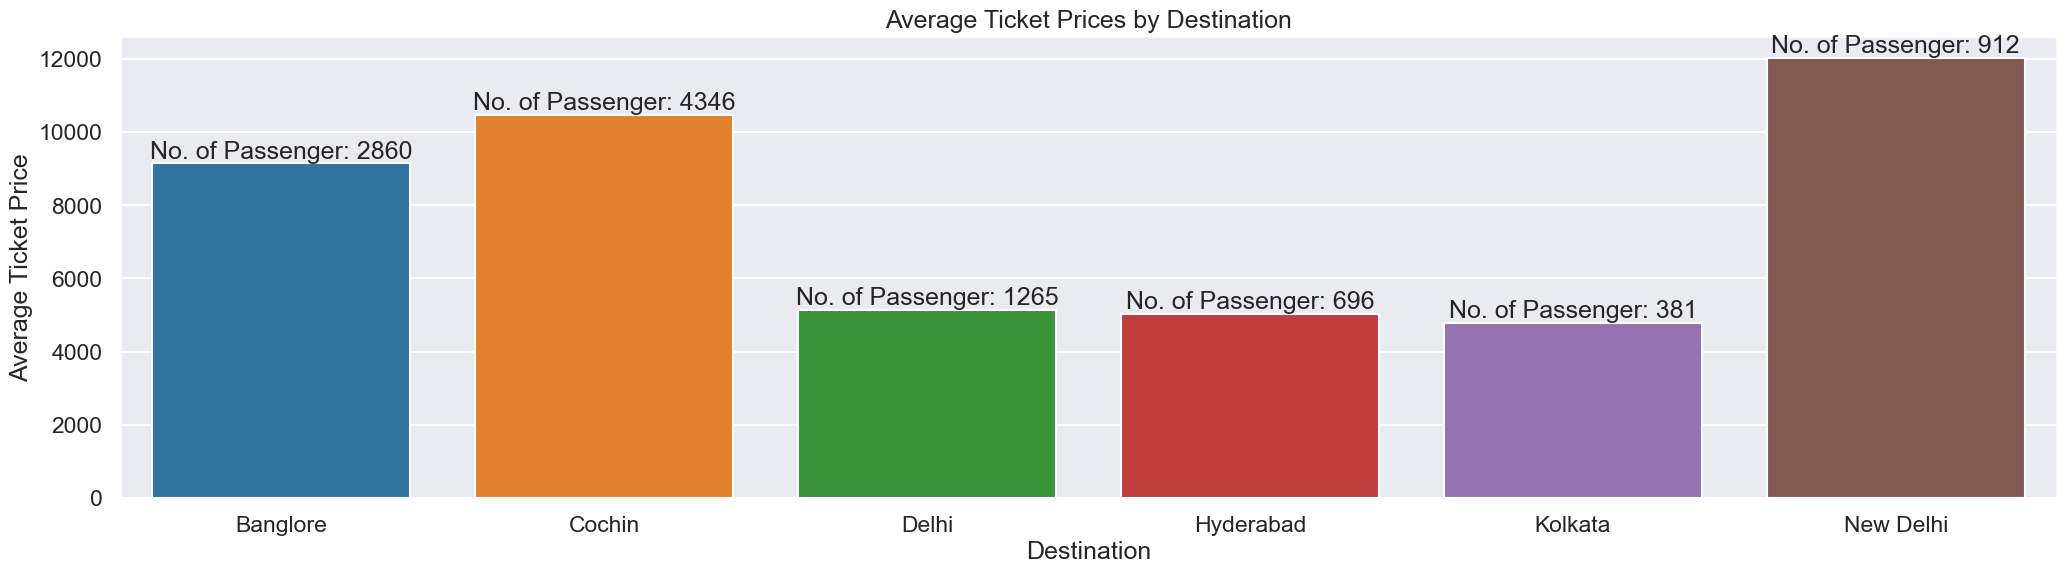

In [102]:
# Group the data by destination and calculate the average ticket price
destination_avg_prices = Flight_Price_Dataset.groupby('Destination (To.)')['Price'].mean().reset_index()
# Group the data by destination and count the number of data points
destination_data_counts = Flight_Price_Dataset['Destination (To.)'].value_counts().reset_index()
destination_data_counts.columns = ['Destination (To.)', 'Data Count']
# Merge the average prices and data counts DataFrames
destination_combined = destination_avg_prices.merge(destination_data_counts, on='Destination (To.)')

destination_total_revenue = Flight_Price_Dataset.groupby('Destination (To.)')['Price'].sum()
destination_combined = destination_combined.merge(destination_total_revenue, on='Destination (To.)')
# Create a dictionary to specify the column name changes
destination_column_name_changes = {'Destination (To.)': 'Destination (To.)', 'Price_x': 'Average Price', 'Data Count' : 'No. of Passenger','Price_y' : 'Total Revenue'}
# Use rename() to apply the column name changes
destination_combined = destination_combined.rename(columns=destination_column_name_changes)

display(destination_combined)


# Create a barplot to visualize average ticket prices by destination
plt.figure(figsize=(25, 6))
sns.barplot(x='Destination (To.)', y='Average Price', data=destination_combined)
plt.title('Average Ticket Prices by Destination')
plt.xlabel('Destination')
plt.ylabel('Average Ticket Price')
# Annotate the bars with data point counts
for index, row in destination_combined.iterrows():
    plt.text(index, row['Average Price'], f'No. of Passenger: {row["No. of Passenger"]}', ha='center', va='bottom')

# Show the plot
plt.show()


- **Barplot for Average Ticket Prices by Airlines -**

,Airline,Average Price,No. of Passenger,Total Revenue
0,Air Asia,5593.745283,318,1778811
1,Air India,9550.795159,1694,16179047
2,GoAir,5861.056701,194,1137045
3,IndiGo,5668.469897,2043,11580684
4,Jet Airways,11599.021081,3700,42916378
5,Jet Airways Business,58358.666667,6,350152
6,Multiple carriers,10902.678094,1196,13039603
7,Multiple carriers Premium economy,11418.846154,13,148445
8,SpiceJet,4335.841718,815,3533711
9,Trujet,4140.000000,1,4140


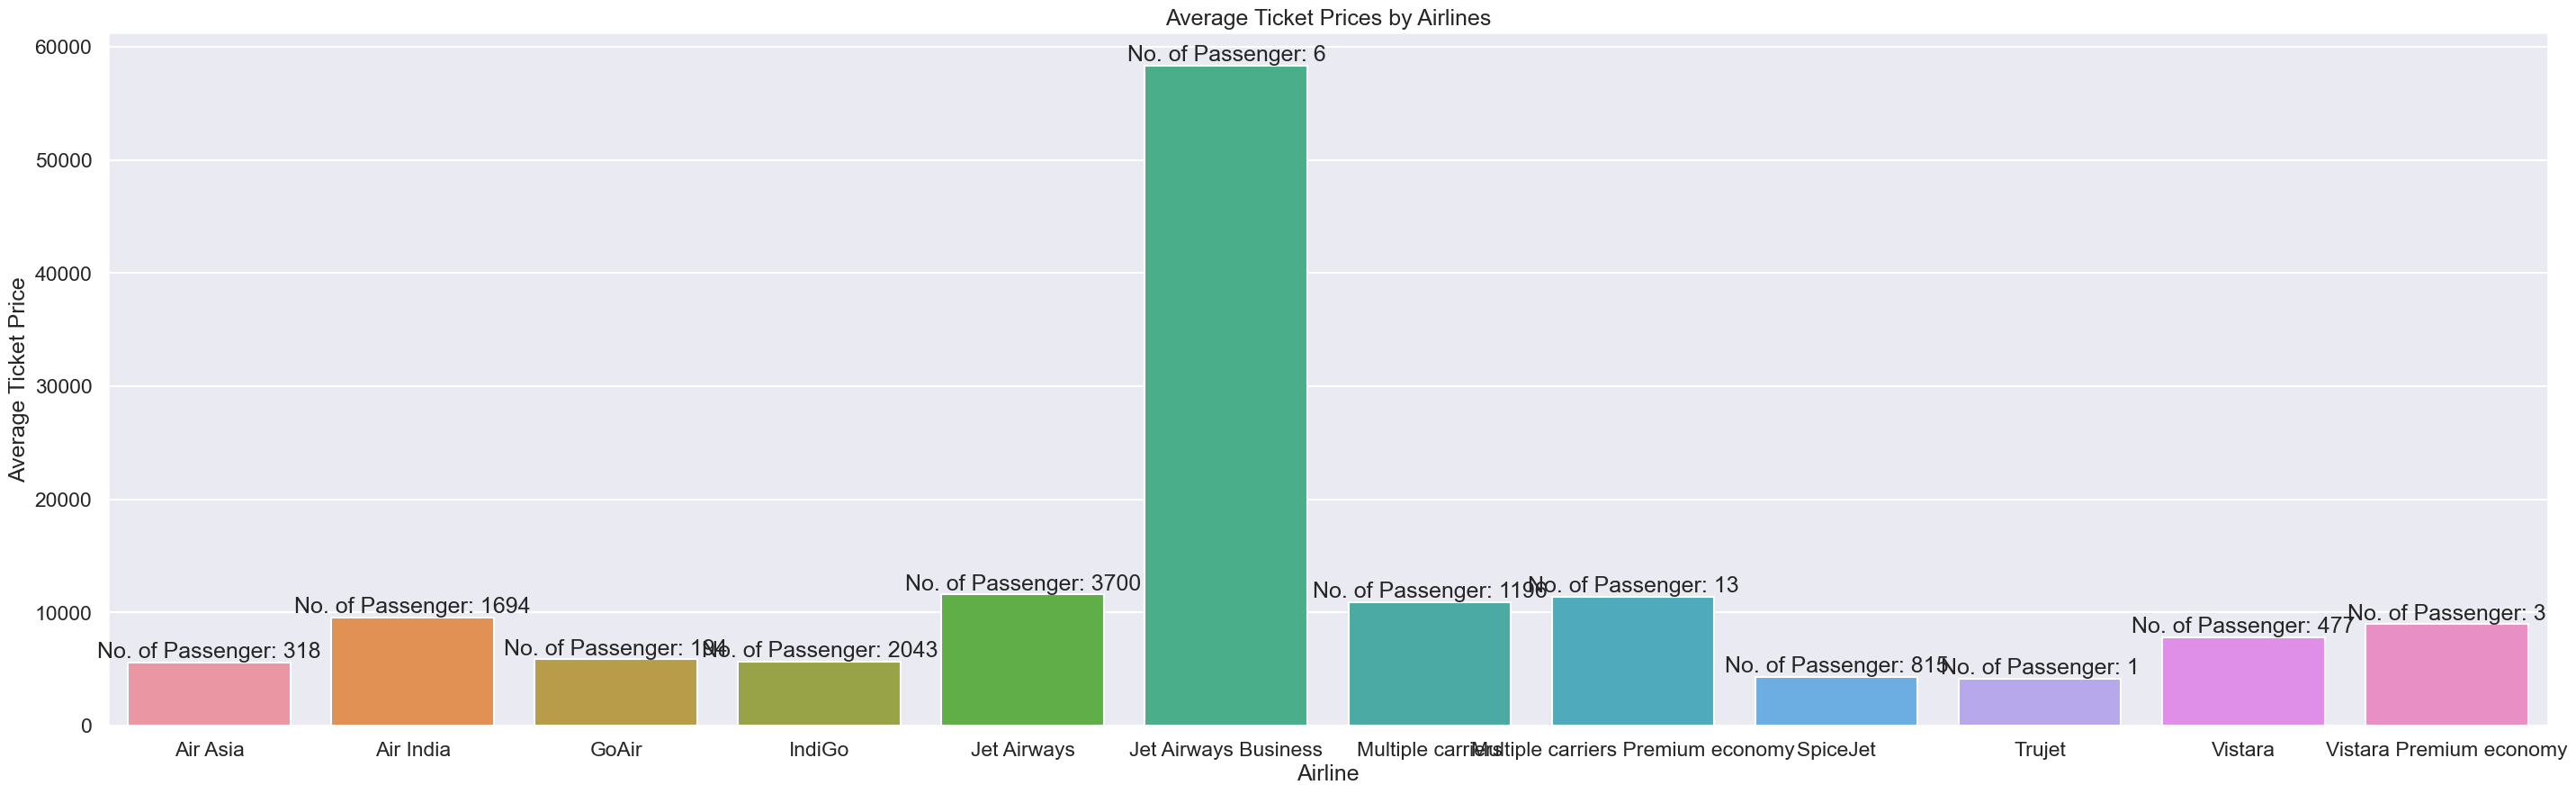

In [103]:
# Assuming Flight_Price_Dataset is your DataFrame
Airline_avg_prices = Flight_Price_Dataset.groupby('Airline')['Price'].mean().reset_index()
# Group the data by destination and count the number of data points
Airline_data_counts = Flight_Price_Dataset['Airline'].value_counts().reset_index()
Airline_data_counts.columns = ['Airline', 'Data Count']
# Merge the average prices and data counts DataFrames
Airline_combined = Airline_avg_prices.merge(Airline_data_counts, on='Airline')

Airline_total_revenue = Flight_Price_Dataset.groupby('Airline')['Price'].sum()
Airline_combined = Airline_combined.merge(Airline_total_revenue, on='Airline')
# Create a dictionary to specify the column name changes
Airline_column_name_changes = {'Airline': 'Airline', 'Price_x': 'Average Price', 'Data Count' : 'No. of Passenger','Price_y' : 'Total Revenue'}
# Use rename() to apply the column name changes
Airline_combined = Airline_combined.rename(columns=Airline_column_name_changes)

display(Airline_combined)


# Create a barplot to visualize average ticket prices by destination
plt.figure(figsize=(35, 10))
sns.barplot(x='Airline', y='Average Price', data=Airline_combined)
plt.title('Average Ticket Prices by Airlines')
plt.xlabel('Airline')
plt.ylabel('Average Ticket Price')
# Annotate the bars with data point counts
for index, row in Airline_combined.iterrows():
    plt.text(index, row['Average Price'], f'No. of Passenger: {row["No. of Passenger"]}', ha='center', va='bottom')

# Show the plot
plt.show()


- **Barplot for Average Ticket Prices by Total Stpos -**

,Total_Stops,Average Price,No. of Passenger,Total Revenue
0,0,5017.915635,3473,17427221
1,1,10593.570032,5626,59599425
2,2,12757.632498,1317,16801802
3,3,13260.674419,43,570209
4,4,17686.000000,1,17686


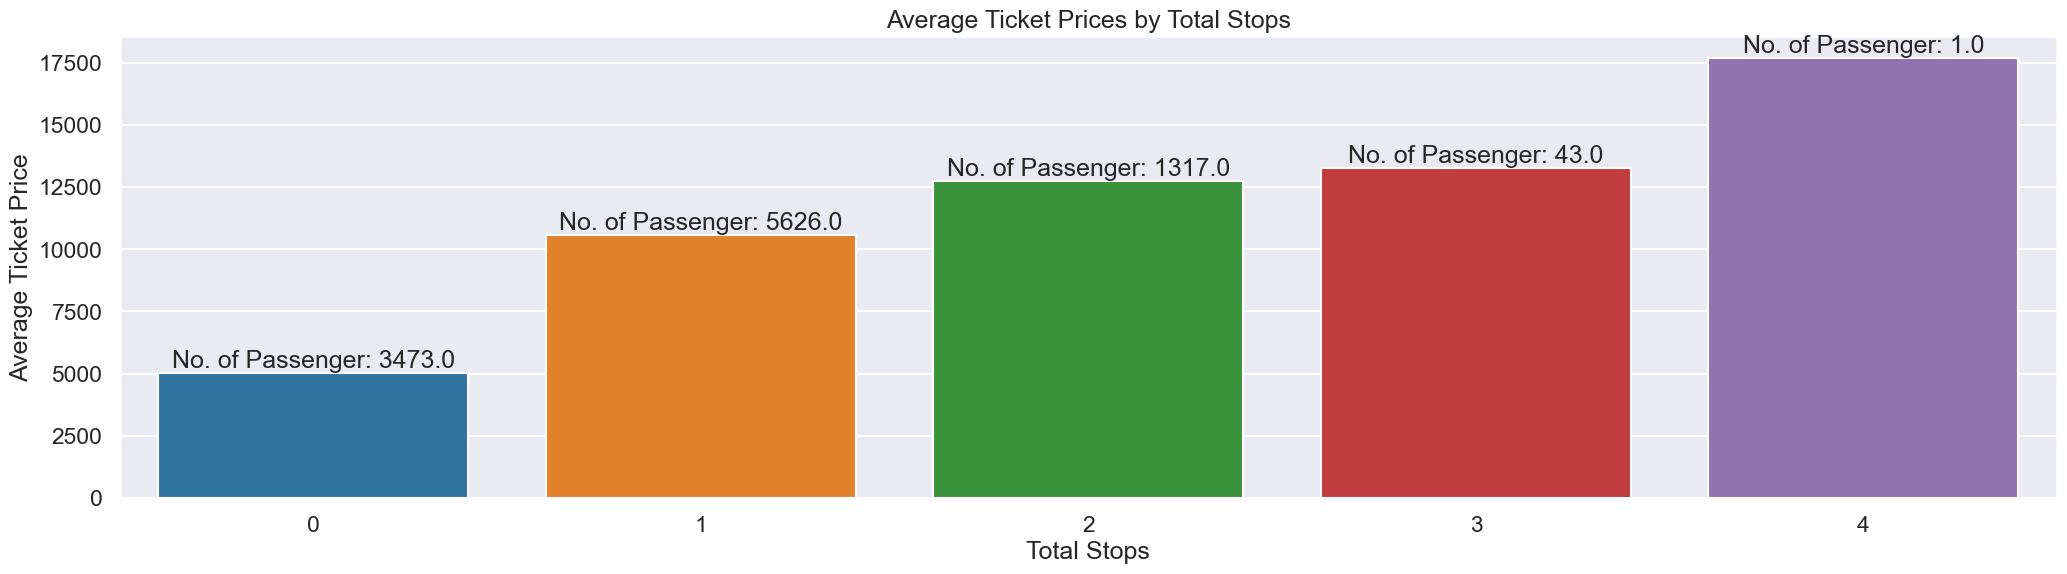

In [104]:
# Group the data by destination and calculate the average ticket price
Total_Stops_avg_prices = Flight_Price_Dataset.groupby('Total_Stops')['Price'].mean().reset_index()
# Group the data by destination and count the number of data points
Total_Stops_data_counts = Flight_Price_Dataset['Total_Stops'].value_counts().reset_index()
Total_Stops_data_counts.columns = ['Total_Stops', 'Data Count']
# Merge the average prices and data counts DataFrames
Total_Stops_combined = Total_Stops_avg_prices.merge(Total_Stops_data_counts, on='Total_Stops')

Total_Stops_total_revenue = Flight_Price_Dataset.groupby('Total_Stops')['Price'].sum()
Total_Stops_combined = Total_Stops_combined.merge(Total_Stops_total_revenue, on='Total_Stops')
# Create a dictionary to specify the column name changes
Total_Stops_column_name_changes = {'Total_Stops': 'Total_Stops', 'Price_x': 'Average Price', 'Data Count' : 'No. of Passenger','Price_y' : 'Total Revenue'}
# Use rename() to apply the column name changes
Total_Stops_combined = Total_Stops_combined.rename(columns=Total_Stops_column_name_changes)

display(Total_Stops_combined)


# Create a barplot to visualize average ticket prices by destination
plt.figure(figsize=(25, 6))
sns.barplot(x='Total_Stops', y='Average Price', data=Total_Stops_combined)
plt.title('Average Ticket Prices by Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Average Ticket Price')
# Annotate the bars with data point counts
for index, row in Total_Stops_combined.iterrows():
    plt.text(index, row['Average Price'], f'No. of Passenger: {row["No. of Passenger"]}', ha='center', va='bottom')

# Show the plot
plt.show()

- **Scatter plots or regression analysis for Average Ticket Prices by Total Duration -**

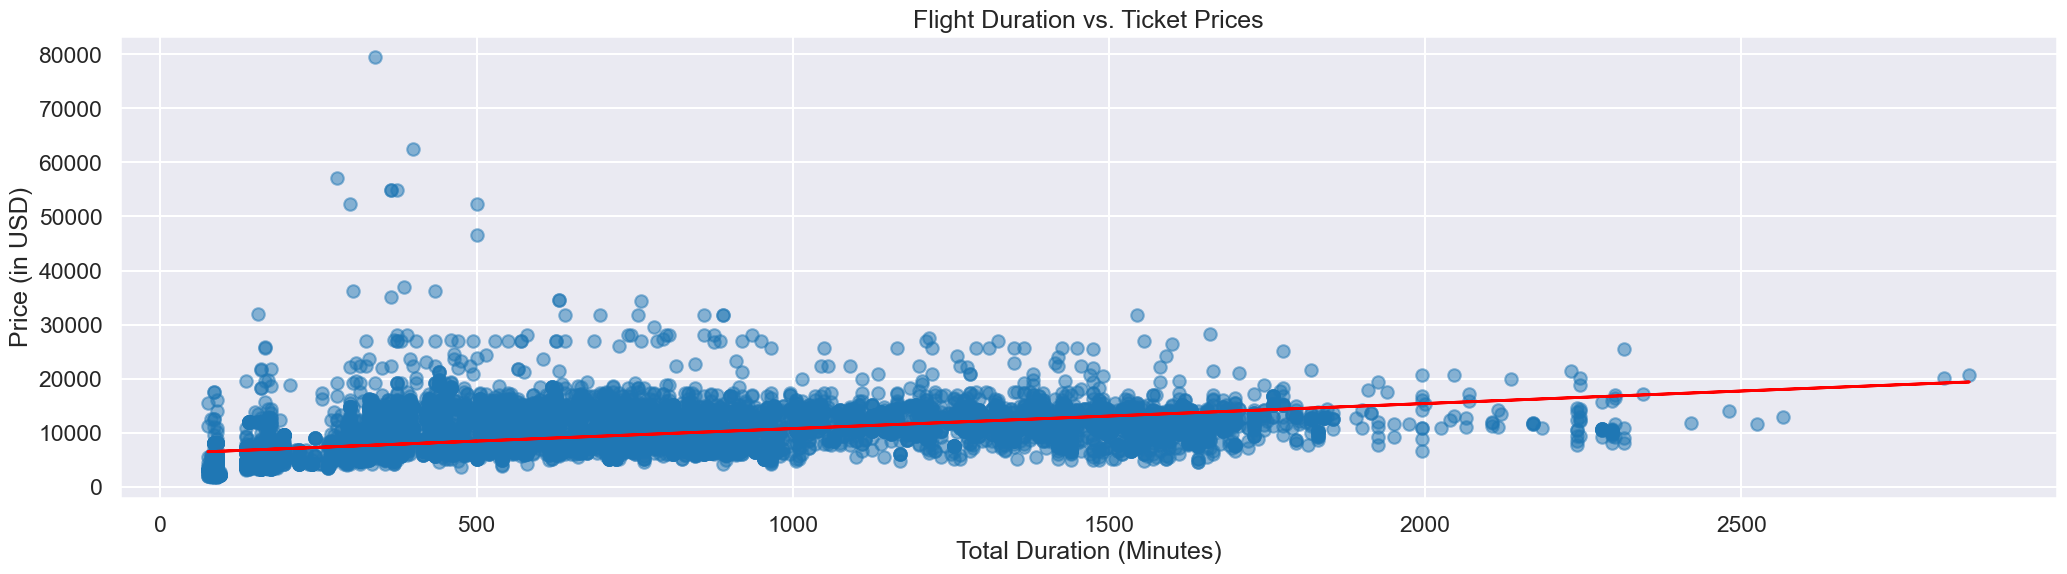

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Create a scatter plot to visualize the relationship between flight duration and ticket prices
plt.figure(figsize=(25, 6))
plt.scatter(Flight_Price_Dataset['Total_Duration'], Flight_Price_Dataset['Price'], alpha=0.5)
plt.title('Flight Duration vs. Ticket Prices')
plt.xlabel('Total Duration (Minutes)')
plt.ylabel('Price (in USD)')
plt.grid(True)

# Perform linear regression analysis
X = Flight_Price_Dataset[['Total_Duration']]
y = Flight_Price_Dataset['Price']

model = LinearRegression()
model.fit(X, y)

# Plot the regression line
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.show()


- **Histogram plot to visualize the distribution of flight prices -**

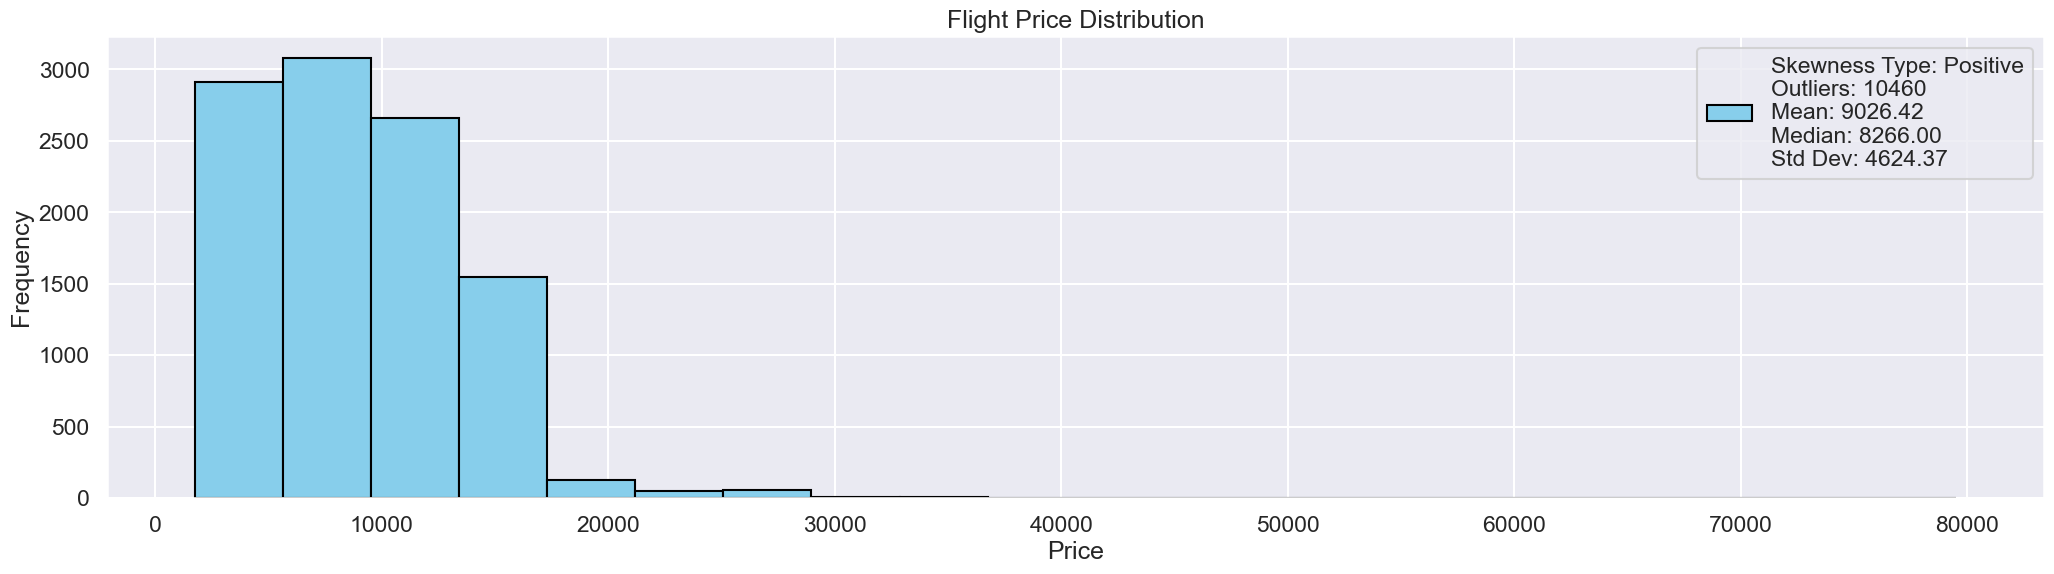

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 6))  
plt.hist(Flight_Price_Dataset['Price'], bins=20, color='skyblue', edgecolor='black')

# Display skewness type and number of outliers as a legend
legend_text = f"Skewness Type: {Price_skewness_type}\nOutliers: {len(Price_outliers)}\nMean: {Price_mean:.2f}\nMedian: {Price_median:.2f}\nStd Dev: {Price_std_dev:.2f}"

# Customize the plot (add labels, title, etc.)
plt.title('Flight Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend([legend_text])  # Provide legend_text as a list

# Show the plot
plt.show()


- **Heatmap Calender of Flight Price -**

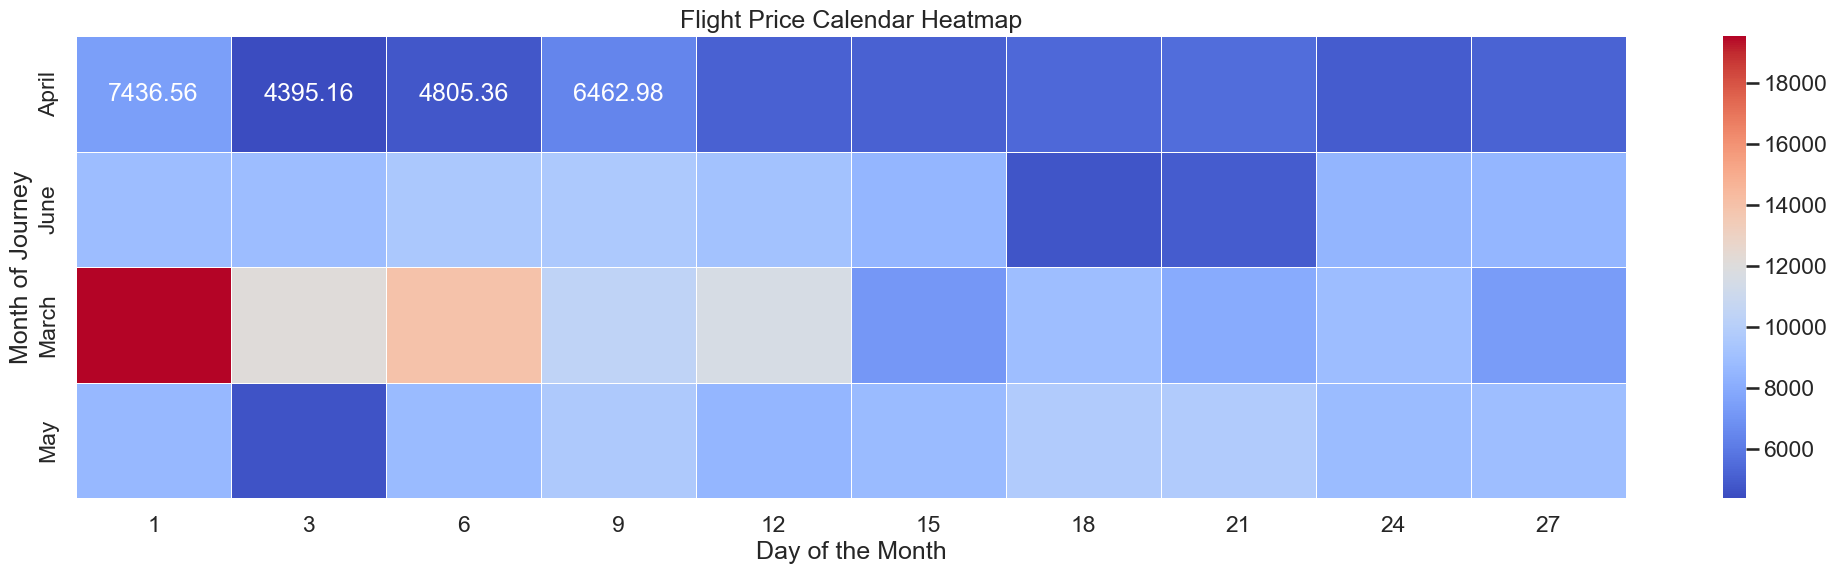

In [107]:
# Pivot the DataFrame to create a matrix for the heatmap
heatmap_data = Flight_Price_Dataset.pivot_table(index=Flight_Price_Dataset['Month of Journey'], columns=Flight_Price_Dataset['Dep_Date'], values='Price')

# Create the heatmap using seaborn
plt.figure(figsize=(25, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Flight Price Calendar Heatmap')
plt.xlabel('Day of the Month')
plt.ylabel('Month of Journey')

plt.show()

##########################################################################################################################################################################################################################################################################################################################

### **$$Assignment\ Question\ :-$$**

**`Q.N0-01`     Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?**

**Ans :-**

- **Load the `Flight Price Dataset` :**

In [108]:
# import pandas as pd

## Load the dataset 
# Flight_Price_Dataset = pd.read_excel('flight_price.xlsx')

## Display top 5 Rows os the Dataset
display(Flight_Price_Dataset.head())

# Print the dimensions
print(f"\nRows of the dataset - {Flight_Price_Dataset.shape[0]} \nColumns of the dataset - {Flight_Price_Dataset.shape[1]}")

,Airline,Airline_encoded,Dep_Date,Dep_Month,Dep_Year,Source (From.),Source_encoded,Destination (To.),Destination_encoded,Boarding_Hours,...,Duration_Minutes,Total_Stops,Additional_Info,Additional_Info_encoded,Price,Month of Journey,Season,Departure_Date,Day_of_Week,Total_Duration
0,IndiGo,3,24,3,2019,Banglore,0,New Delhi,5,22,...,50,0,No info,7,3897,March,Spring,2019-03-24,Sunday,170
1,Air India,1,1,5,2019,Kolkata,3,Banglore,0,5,...,25,2,No info,7,7662,May,Summer,2019-05-01,Wednesday,445
2,Jet Airways,4,9,6,2019,Delhi,2,Cochin,1,9,...,0,2,No info,7,13882,June,Summer,2019-06-09,Sunday,1140
3,IndiGo,3,12,5,2019,Kolkata,3,Banglore,0,18,...,25,1,No info,7,6218,May,Summer,2019-05-12,Sunday,325
4,IndiGo,3,1,3,2019,Banglore,0,New Delhi,5,16,...,45,1,No info,7,13302,March,Spring,2019-03-01,Friday,285



Rows of the dataset - 10460 
Columns of the dataset - 24


---------------------------------------------------------------------------------------------------------------------------------------------------------------

**`Q.N0-02`     What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.**

**Ans :-**

Skew Value of Price - 1.85820111587459
Type of Skewness of Price - Positive

Number of Outliers present in Price - 10460

Min of Price - 1759
Mean of Price - 9026.419024856597
Median of Price - 8266.0
Std Dev of Price - 4624.369975383028
Max of Price - 79512


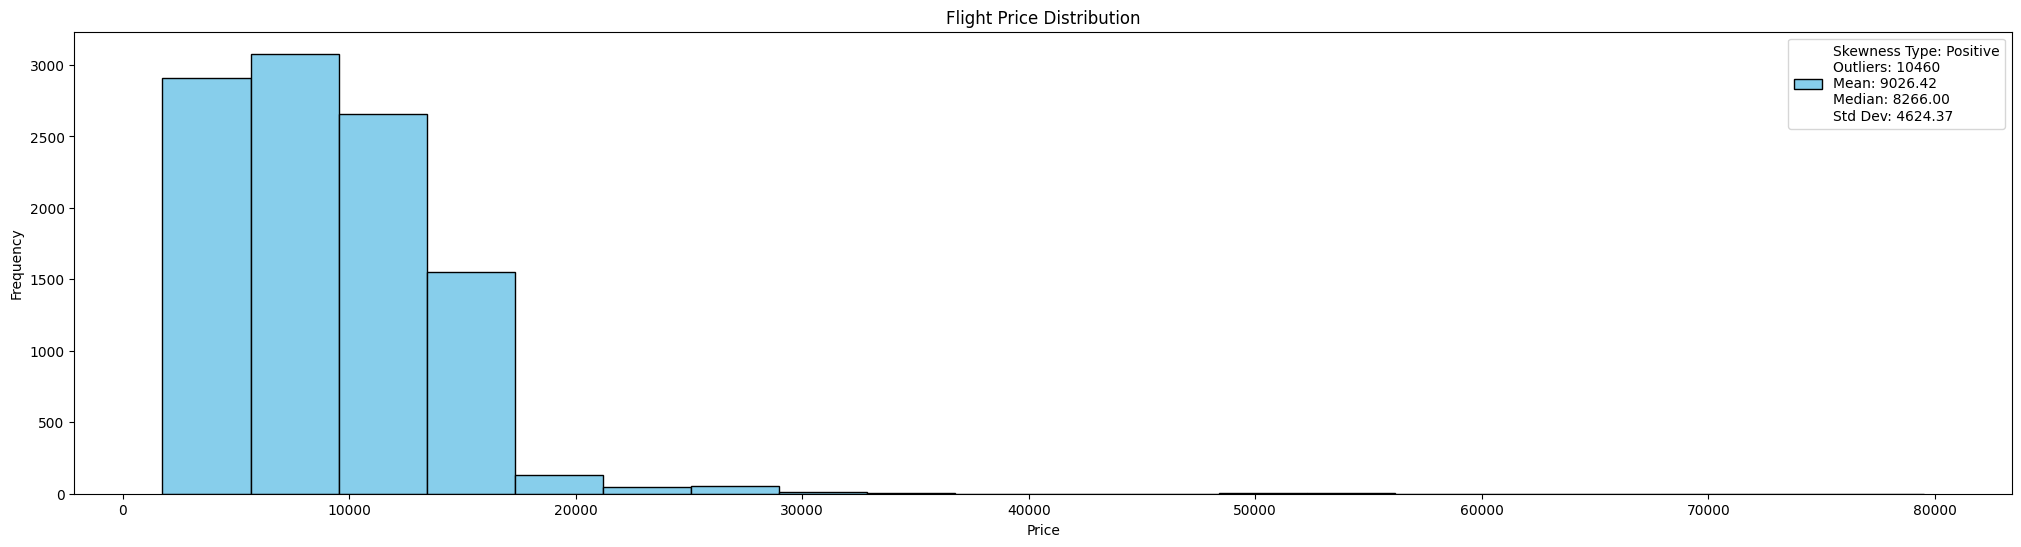

In [109]:
print(f"Skew Value of Price - {Price_skewness}")
print(f"Type of Skewness of Price - {Price_skewness_type}")
print(f"\nNumber of Outliers present in Price - {len(Price_outliers)}")
print(f"\nMin of Price - {Price_min}")
print(f"Mean of Price - {Price_mean}")
print(f"Median of Price - {Price_median}")
print(f"Std Dev of Price - {Price_std_dev}")
print(f"Max of Price - {Price_max}")

display(Image('PLOT/Price Distribution.png'))

**Insights :-**

- **Skewness Type: `Positive`** 
    
    -  The positive skewness indicates that the distribution of flight prices is skewed to the right.

    -  This means that there are more lower-priced flights, and relatively fewer expensive flights.
    
    -  The tail of the distribution extends to the right, indicating the presence of some high-priced outliers.

- **Outliers: `10,460`** 

    -  There are a significant number of outliers in the dataset, specifically 10,460 flights with prices exceeding the threshold of 2.5 times the standard deviation from the mean.
    
    -  These outliers could represent exceptionally expensive flights or data anomalies that deviate significantly from the typical price range.

- **Mean Price: `$9,026.42`**

    -  The mean (average) flight price is approximately $9,026.42.
    
    -  However, due to the positive skewness and the presence of outliers, the mean may be influenced by these higher-priced flights, making it higher than the median.

- **Median Price: `$8,266.00`** 

    -  The median flight price, which represents the middle value when all prices are sorted in ascending order, is $8,266.00.
    
    -  This value is lower than the mean and is less affected by the presence of outliers.
    
    -  It provides a more representative measure of the central tendency of flight prices.

- **Standard Deviation: `$4,624.37`**

    -  The standard deviation measures the dispersion or spread of the data.
    
    -  `In this case`, the standard deviation of $4,624.37 indicates that flight prices vary quite a bit from the mean. 
    
    -  The presence of outliers contributes to this variability.

`In summary`, the positive skewness and a large number of outliers suggest that while the majority of flights have relatively lower prices, there are significant exceptions with very high prices.

It's essential to consider the specific context of our dataset and the domain to draw actionable insights from these statistics. Depending on your goals, you may want to further investigate the outliers and their reasons or focus on strategies for pricing flights competitively within the main distribution of prices.

------------------------------------------------------------------------------------------------------------------------------------------------------

**`Q.N0-03`    What is the range of prices in the dataset? What is the minimum and maximum price?**


**Ans :-**

In [110]:
print("Minimum Price:", (Flight_Price_Dataset['Price'].min()))
print("Maximum Price:", (Flight_Price_Dataset['Price'].max()))
print("Price Range:", (Flight_Price_Dataset['Price'].max()) - (Flight_Price_Dataset['Price'].min()))

Minimum Price: 1759
Maximum Price: 79512
Price Range: 77753


------------------------------------------------------------------------------------------------------------------------------------------------------------------

**`Q.N0-04`    How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.**

**Ans :-**

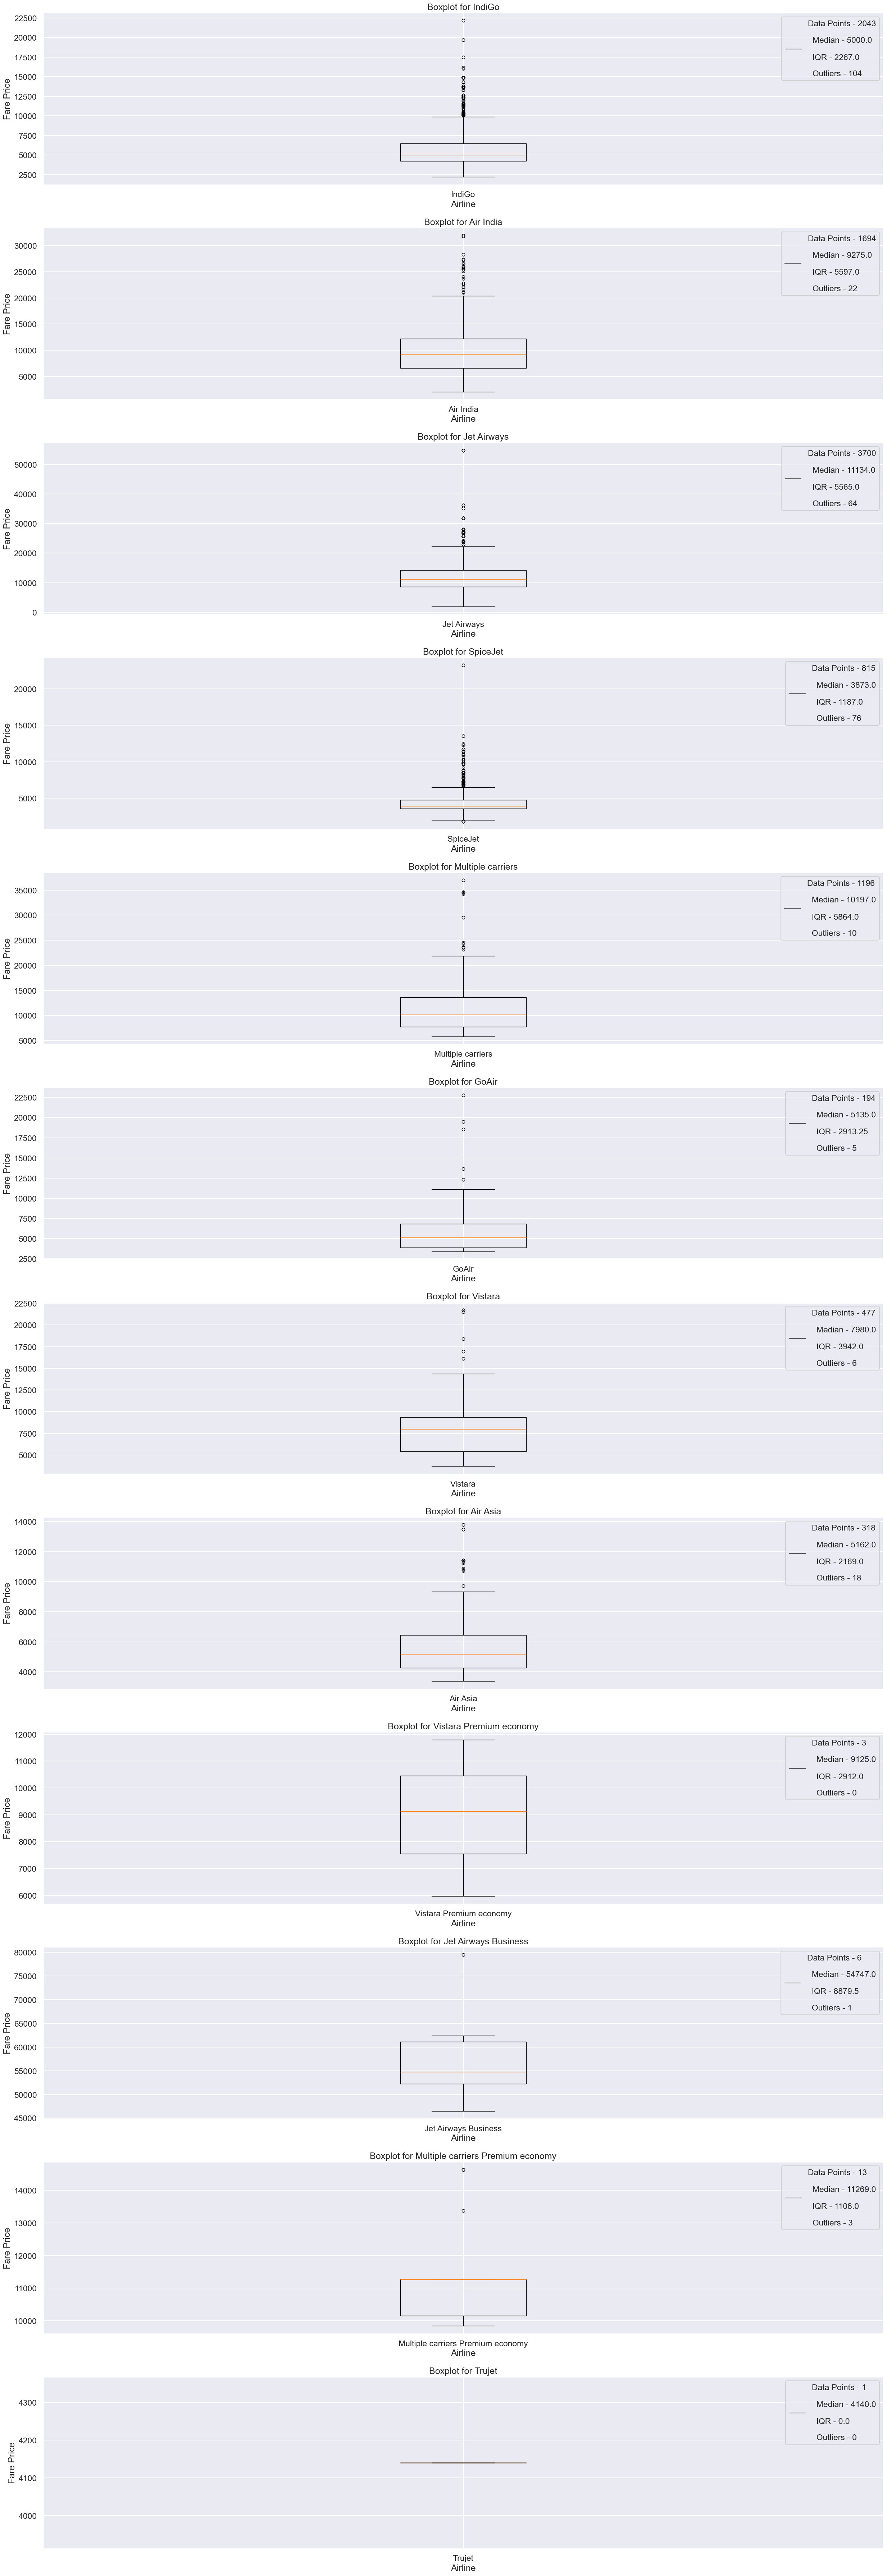

In [111]:
# Create a boxplot for each unique airline
unique_airlines = Flight_Price_Dataset['Airline'].unique()

# Calculate the number of rows for subplots
num_rows = len(unique_airlines)
num_cols = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 72))
axes = axes.flatten()


for i, airline in enumerate(unique_airlines):
  airline_data_point = Flight_Price_Dataset[Flight_Price_Dataset['Airline'] == airline]
  airline_median = airline_data_point['Price'].median()
  
  # Calculate and display the interquartile range (IQR)
  q1 = airline_data_point['Price'].quantile(0.25)
  q3 = airline_data_point['Price'].quantile(0.75)
  iqr = q3 - q1
  
  # Identify and display outliers
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = airline_data_point[(airline_data_point['Price'] < lower_bound) | (airline_data_point['Price'] > upper_bound)]
  
  # Display skewness type and number of outliers as a legend
  legend_text = f"""Data Points - {len(airline_data_point)}\n
  Median - {airline_median}\n
  IQR - {iqr}\n
  Outliers - {len(outliers)}"""
  
  ax = axes[i]
  ax.set_title(f"Boxplot for {airline}")
  ax.set_xlabel("Airline")
  ax.set_ylabel("Fare Price")
  
  # Plot the boxplot - remove redundant 'ax' argument
  ax.boxplot(airline_data_point['Price'], labels=[airline])
  
  # Create a legend with the legend_text
  ax.legend([legend_text], loc='upper right')

plt.tight_layout()
plt.show()


**Insights :-**

- **Premium Airlines**

    -  Jet Airways Business and Multiple carriers Premium economy are examples of premium airlines with significantly higher median ticket prices. They also have relatively high IQRs, indicating price variability within the premium segment.

- **Budget Airlines**

    -  Airlines like GoAir and Air Asia have lower median ticket prices, suggesting they may be positioned as budget-friendly options. These airlines also tend to have lower IQRs, indicating relatively consistent pricing.

- **No Outliers for Vistara Premium economy and Trujet**

    -  Vistara Premium economy and Trujet have no outliers, indicating a more stable pricing strategy without extreme price variations.

- **Potential Pricing Strategy**

    -  Airlines with a high number of outliers may be using dynamic pricing strategies to adjust prices based on demand. Airlines with smaller IQRs and fewer outliers may have more consistent pricing strategies.

- **Competitive Analysis**

    -  Airlines can use these insights to understand how their pricing compares to competitors. For example, if an airline wants to position itself as a budget carrier, it can analyze the median and IQR of other budget airlines.

- **Customer Segmentation**

    - Airlines can also use this data to target different customer segments. For instance, premium airlines can cater to high-income travelers, while budget airlines can target cost-conscious travelers.

**`Summary` -**

-  These insights are based solely on ticket price data and do not take into account factors like route, class of service, time of booking, or other amenities offered by the airlines. 

-  A comprehensive analysis would require considering these additional factors for a more accurate understanding of airline pricing strategies and customer behavior.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------

**`Q.N0-05`    Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.**

**Ans :-**

-  **Finding Outliers of Every Numerical Features :**

In [112]:
import pandas as pd
import numpy as np

# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Loop through numerical features and identify outliers
outliers = {}
for feature in Flight_Price_numerical_features:
    is_outlier = detect_outliers_iqr(Flight_Price_Dataset[feature])
    outliers[feature] = Flight_Price_Dataset[is_outlier]

# Print the outliers for each feature
for feature, outlier_data in outliers.items():
    if not outlier_data.empty:
        print(f"No. of Outliers in {feature}: {len(outlier_data)}")

No. of Outliers in Price: 94


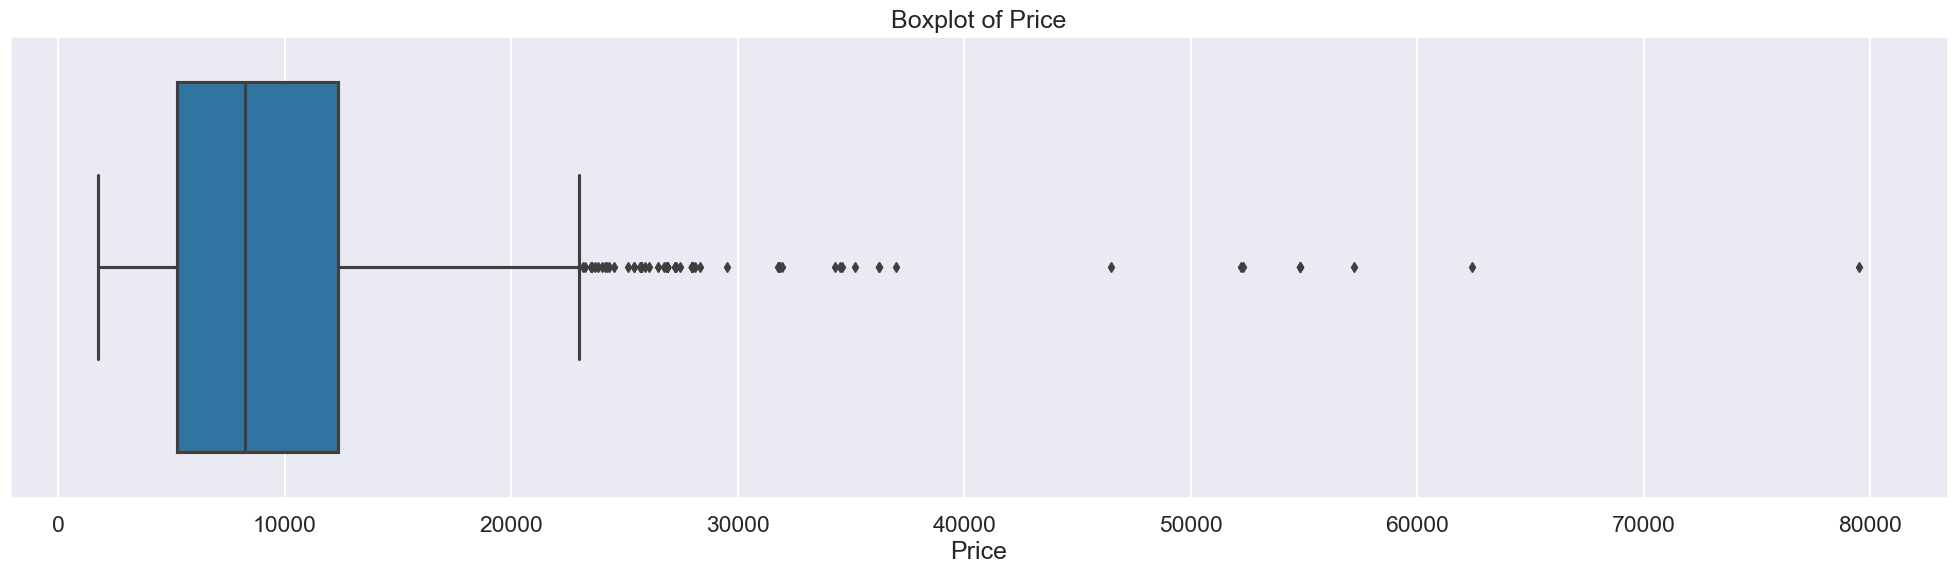

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

List_of_Outliers_Column = []

# Print the outliers for each feature
for feature, outlier_data in outliers.items():
    if not outlier_data.empty:
        List_of_Outliers_Column.append(feature)

# Create individual boxplots for each numerical feature with outliers
for feature in List_of_Outliers_Column:
    plt.figure(figsize=(25, 6))
    sns.boxplot(data=Flight_Price_Dataset, x=feature)
    plt.title(f'Boxplot of {feature}')
    plt.show()

**Interpretation of their potential impact on our analysis**

- **Total_Stops**

   - **No. of Outliers** - 44

   - **Interpretation** - The presence of 44 outliers in the 'Total_Stops' feature suggests that there are instances where the number of stops is significantly different from the majority of data points. This could be due to rare flight routes or exceptional circumstances.

   - **Impact on Analysis** - These outliers may impact summary statistics, such as the mean and variance, for this feature. Depending on our analysis goals, we may choose to investigate these outliers further to understand their significance or consider transforming or removing them.

- **Price**

   - **No. of Outliers** - 94

   - **Interpretation** - With 94 outliers in the 'Price' feature, it indicates that there are instances with extremely high or low ticket prices compared to the majority of fares. These could be due to special promotions, errors, or unique circumstances.

   - **Impact on Analysis** - Outliers in price can significantly affect the overall distribution and statistics of this feature. In practical terms, these outliers could influence revenue analysis, demand forecasting, or pricing strategy evaluations. Careful consideration is needed to decide whether to handle or retain these outliers in our analysis.

- **Duration_Hours**

   - **No. of Outliers** - 67

   - **Interpretation** - The 'Duration_Hours' feature has 67 outliers, indicating that some flight durations are substantially different from the norm. These may represent exceptionally long or short flights.
   
   - **Impact on Analysis** - Outliers in flight duration can affect various aspects of analysis, including schedule optimization, customer satisfaction assessment, or punctuality evaluations. Depending on your analysis objectives, we may need to investigate and decide how to treat these outliers, as they can skew the average flight duration.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**`Q.N0-06`    You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?**

**`Q.N0-07`    You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?**

**`Q.N0-08`    You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?**

**Ans :-**

### **Statistical Analysis & Peak Season Identification :-**

In [114]:
# Seasonal Analysis
# Calculate monthly averages of ticket prices
monthly_avg_prices = Flight_Price_Dataset.groupby('Month of Journey')['Price'].mean().reset_index()
# Identify the month with the highest average ticket price
peak_month = monthly_avg_prices[monthly_avg_prices['Price'] == monthly_avg_prices['Price'].max()]['Month of Journey'].values[0]
peak_season = Flight_Price_Dataset[Flight_Price_Dataset['Month of Journey'] == peak_month]['Season'].unique().tolist()[0]
print(f"The peak travel season is in {peak_season}")
print(f"The peak travel month is in {peak_month}")


# Statistical Tests (e.g., t-test)
# Example of a t-test comparing two seasons
spring_prices = Spring['Price']
summer_prices = Summer['Price']
t_stat, p_value = stats.ttest_ind(spring_prices, summer_prices)
if p_value < 0.05:
    print("\nThe difference in ticket prices between Spring and Summer is statistically significant.")
else:
    print("\nThe difference in ticket prices between Spring and Summer is not statistically significant.")

# Calculate mean ticket prices for Spring and Summer
mean_price_spring = spring_prices.mean()
mean_price_summer = summer_prices.mean()

# Calculate the percentage difference
percentage_difference = ((mean_price_spring - mean_price_summer) / mean_price_spring) * 100
print(f"\nPrice of the Ticket in Summer Seanson is {percentage_difference:.2f}% Cheaper then Price of the Ticket in Spring Season")


import holidays

# Create an instance of the Indian holiday calendar
indian_holidays = holidays.India(years=2019)

# Get the list of holidays for India in the year 2019
holidays_2019 = indian_holidays.items()

Holiday_Date = []
# Print the list of holidays
for date, holiday_name in holidays_2019:
    Holiday_Date.append(date)
    
    
# Add a column to the DataFrame indicating if the departure date is a holiday
Flight_Price_Dataset['Is_Holiday'] = Flight_Price_Dataset['Departure_Date'].astype(str).isin(Holiday_Date)

# Analyze average ticket prices on holidays vs. non-holidays
avg_price_on_holidays = Flight_Price_Dataset[Flight_Price_Dataset['Is_Holiday']]['Price'].mean()
avg_price_on_non_holidays = Flight_Price_Dataset[~Flight_Price_Dataset['Is_Holiday']]['Price'].mean()

print(f"\nAverage Ticket Price on Holidays: {avg_price_on_holidays}")
print(f"Average Ticket Price on Non-Holidays: {avg_price_on_non_holidays}")


The peak travel season is in Spring
The peak travel month is in March

The difference in ticket prices between Spring and Summer is statistically significant.

Price of the Ticket in Summer Seanson is 4.27% Cheaper then Price of the Ticket in Spring Season

Average Ticket Price on Holidays: nan
Average Ticket Price on Non-Holidays: 9026.419024856597


### **Presentation of Findings :-**

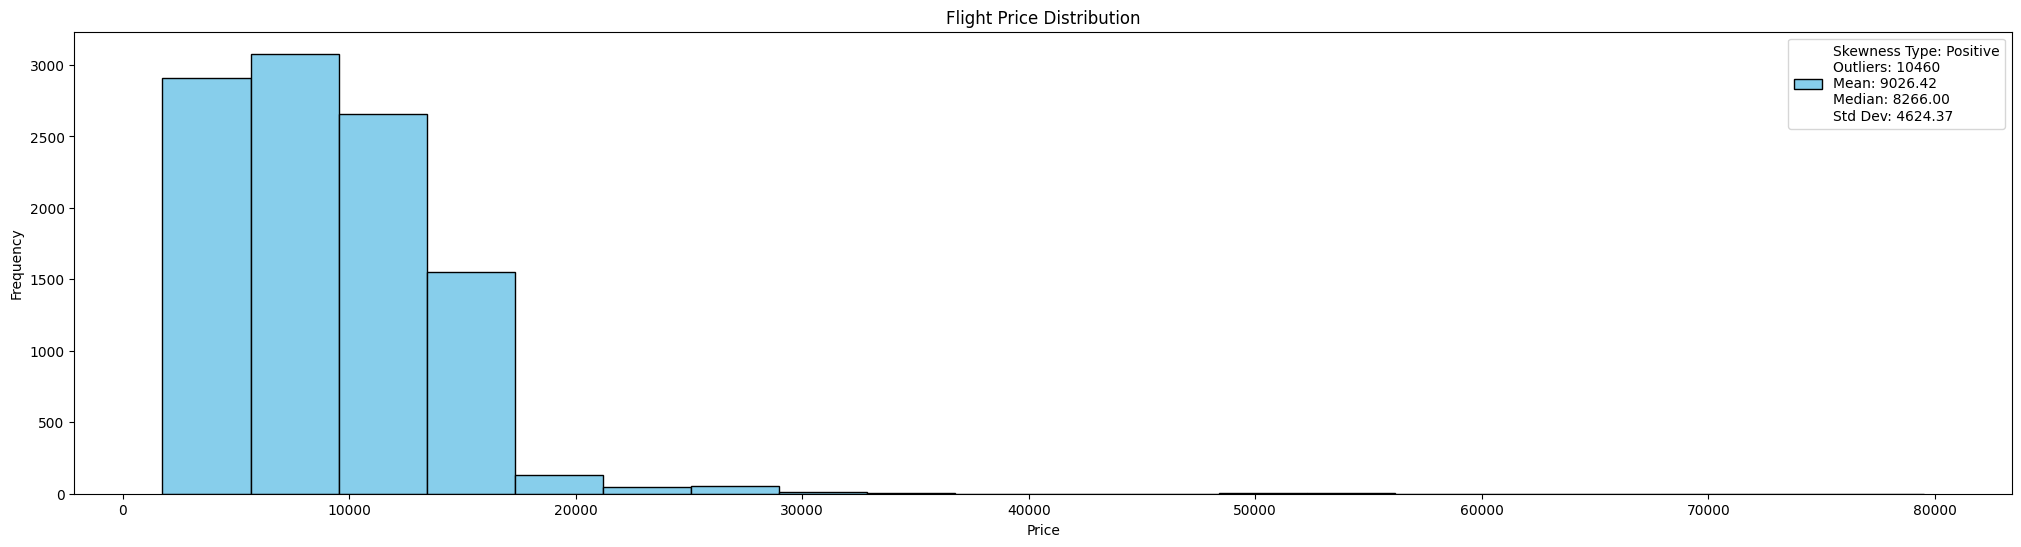

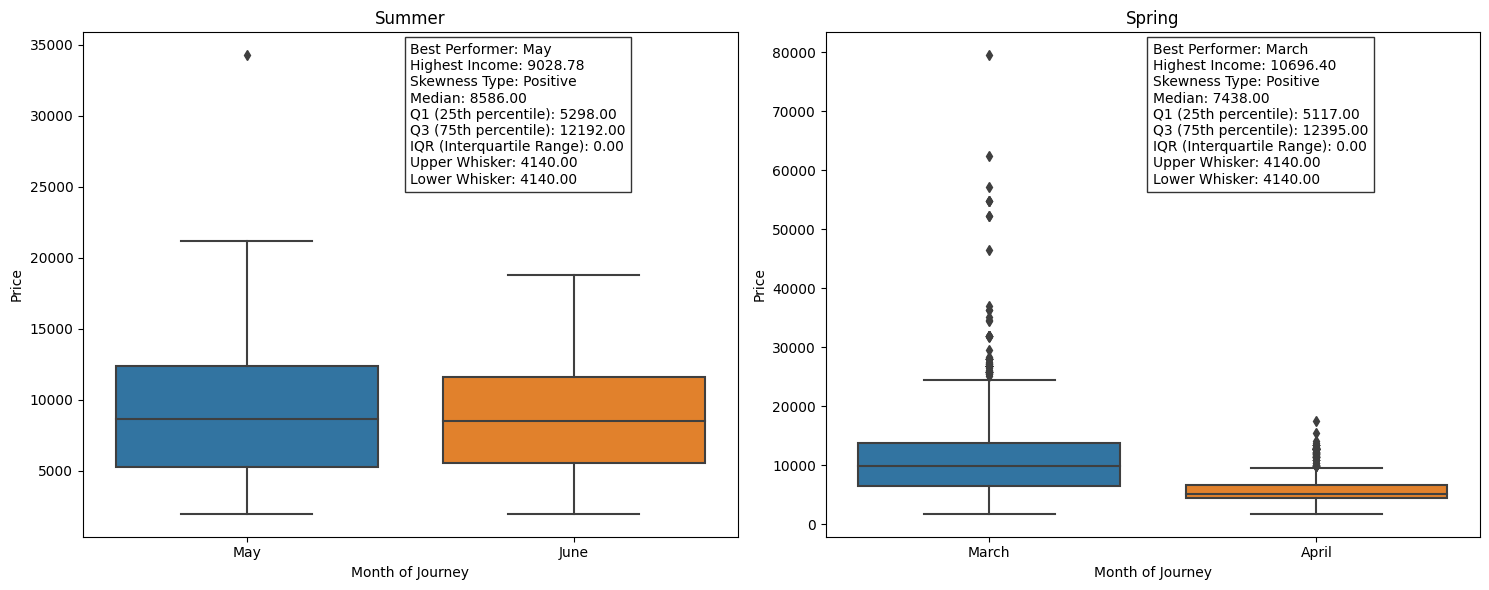

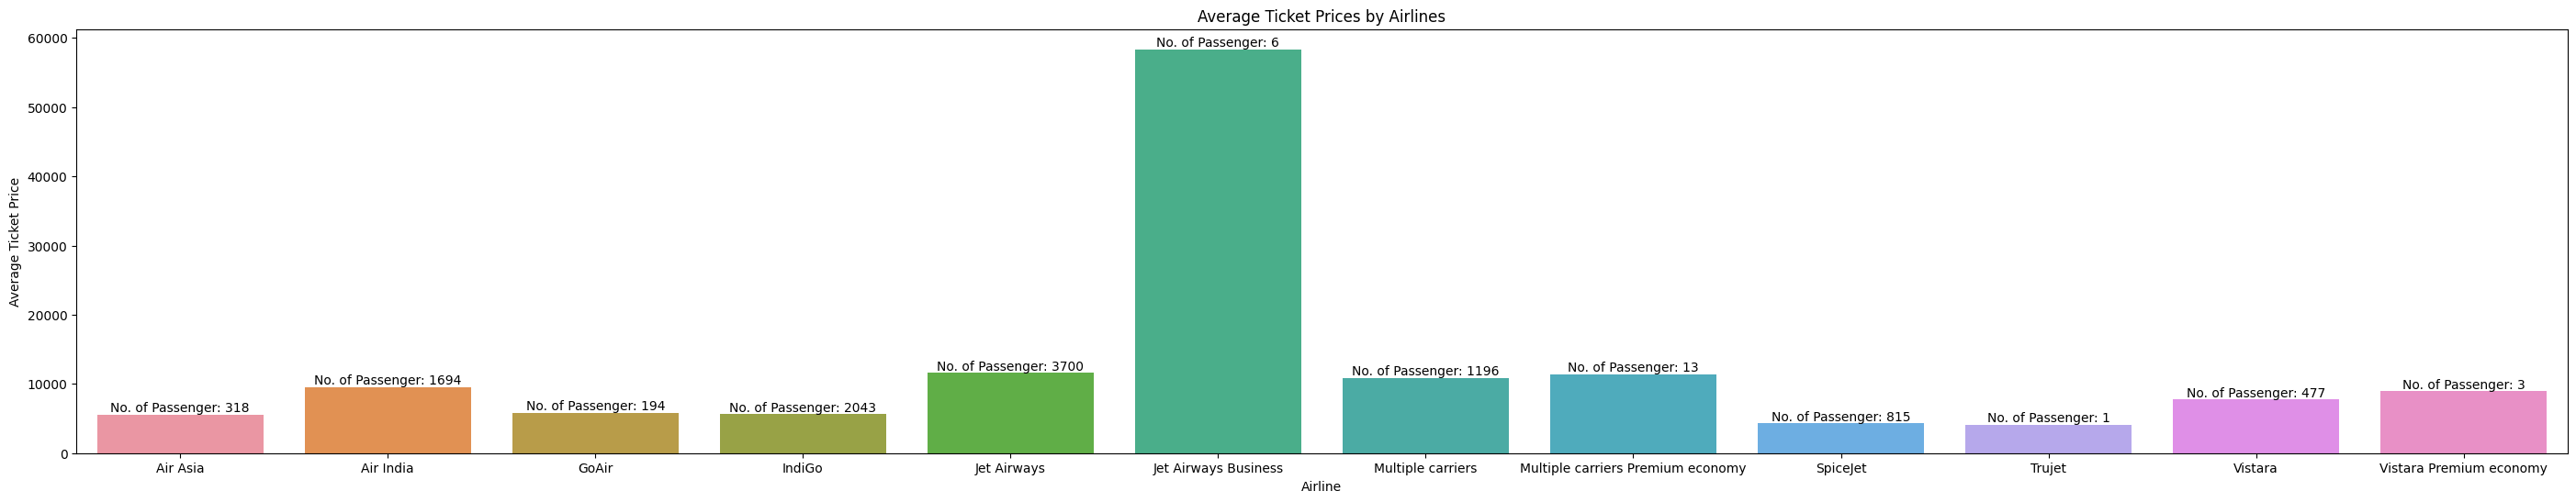

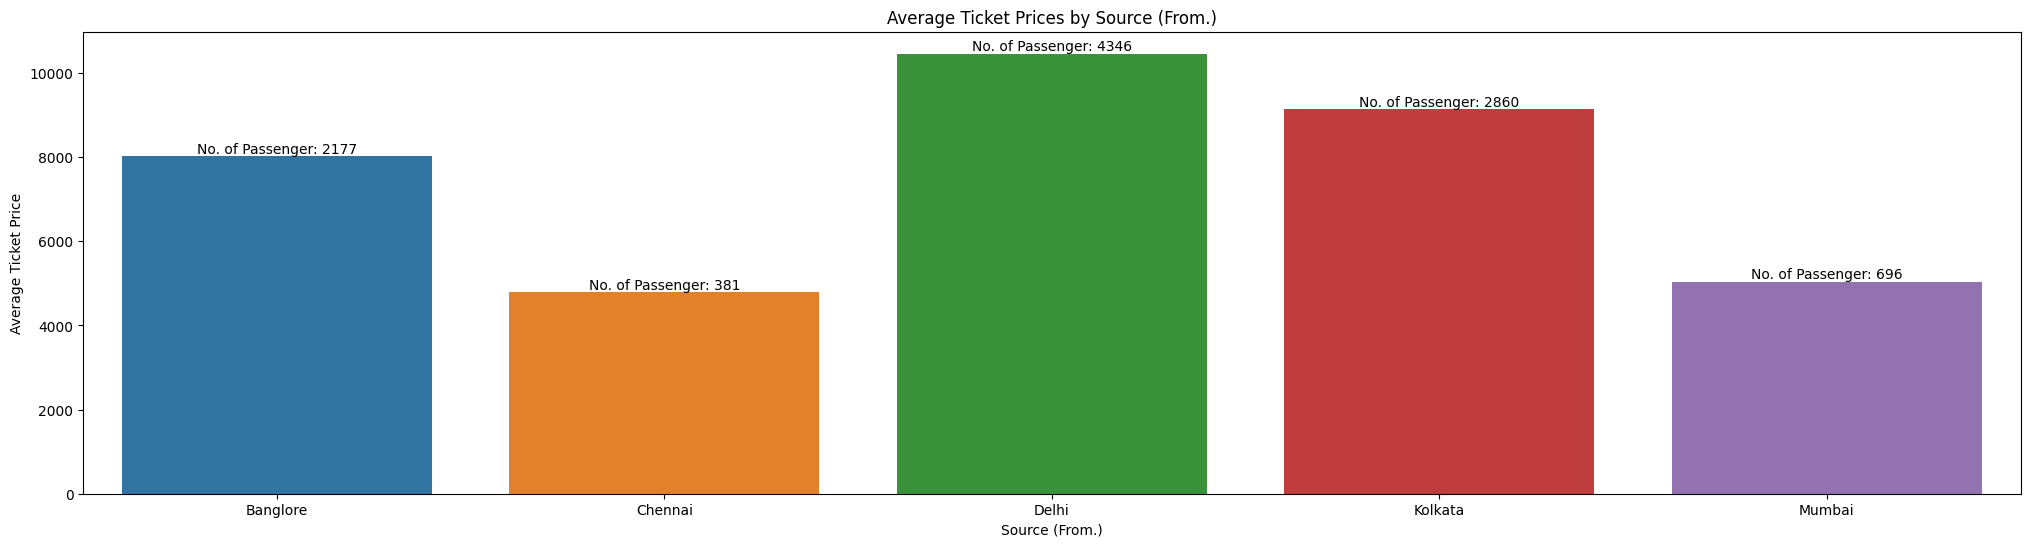

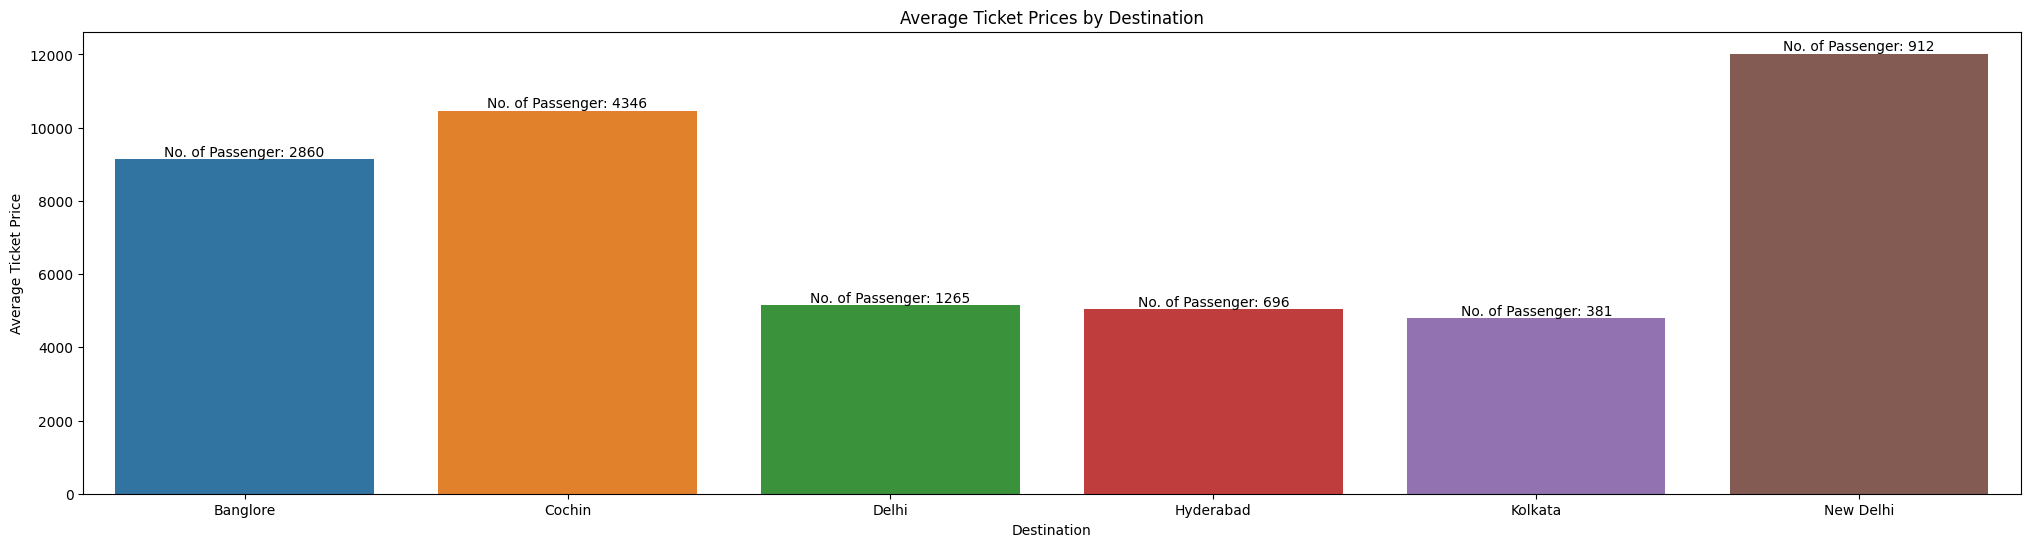

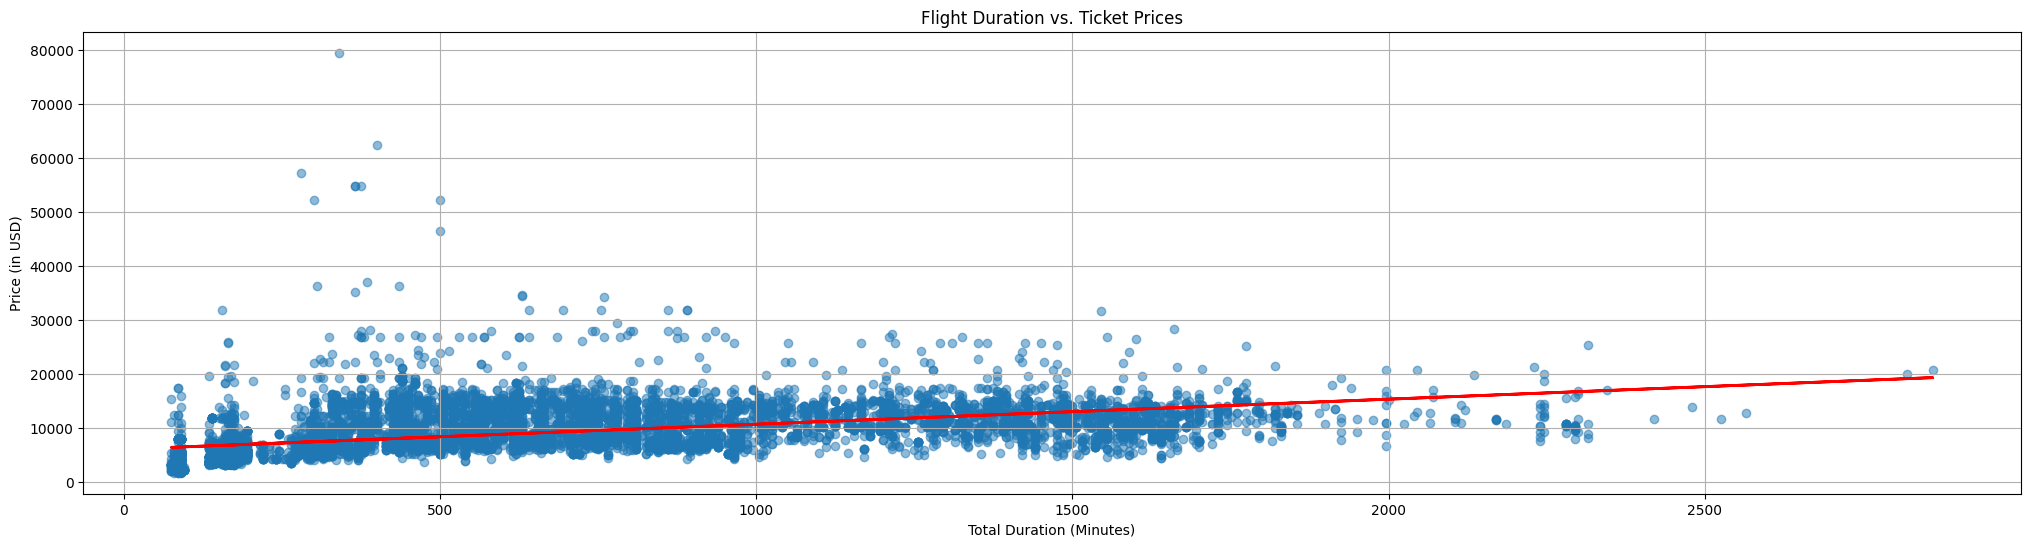

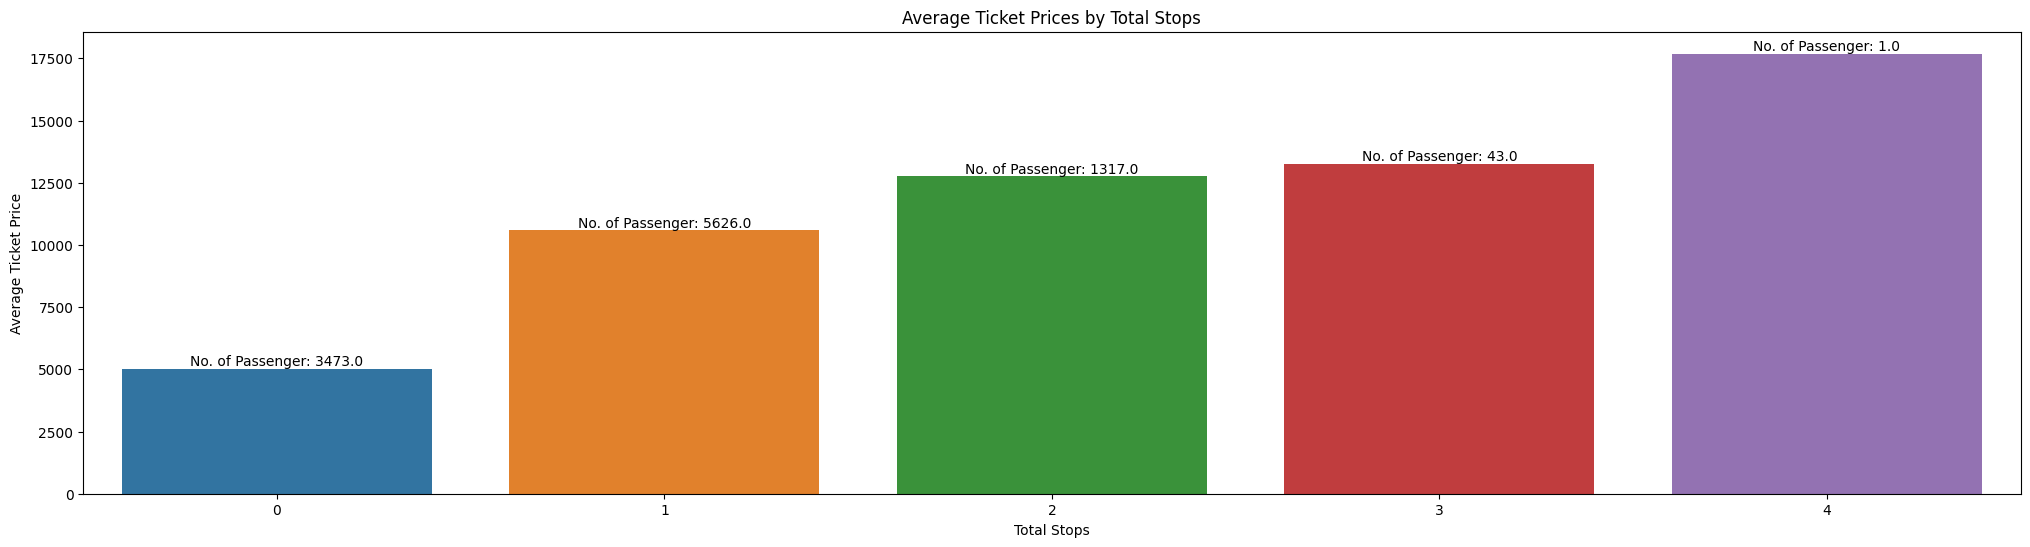

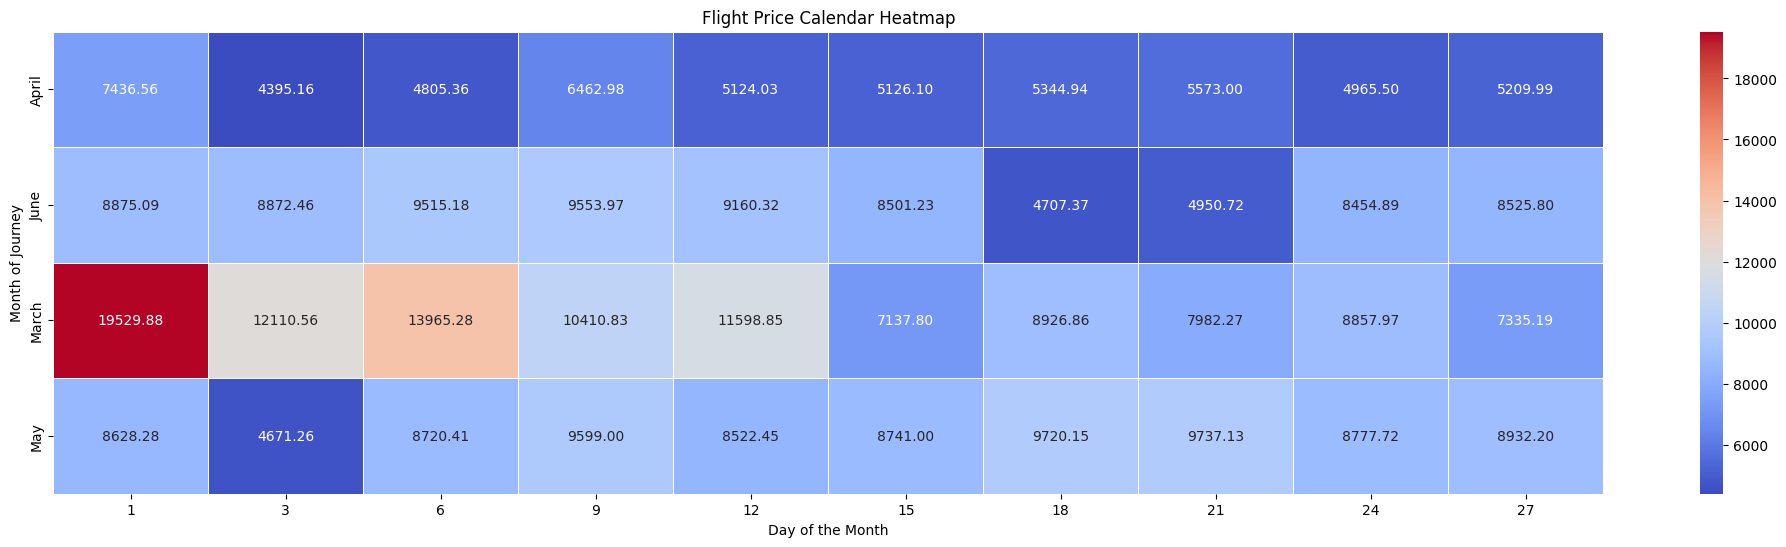

In [115]:
image_paths = ['PLOT\Price Distribution.png', 
               'PLOT/Seasonal_Summary.png', 
               'PLOT/Average_Price_Airlines.png', 
               'PLOT/Source.png', 
               'PLOT\Destinations.png', 
               'PLOT/Flights Duration.png', 
               'PLOT/Total Stops.png', 
               'PLOT/Flight Price Calender.png']

# Display each image one by one
for path in image_paths:
    display(Image(filename=path))

In [116]:
print(f"The peak travel season is in {peak_season}")
print(f"The peak travel month is in {peak_month}")

if p_value < 0.05:
    print("\nThe difference in ticket prices between Spring and Summer is statistically significant.")
else:
    print("\nThe difference in ticket prices between Spring and Summer is not statistically significant.")

print(f"\nPrice of the Ticket in Summer Seanson is {percentage_difference:.2f}% Cheaper then Price of the Ticket in Spring Season")

print(f"\nAverage Ticket Price on Holidays: {avg_price_on_holidays}")
print(f"Average Ticket Price on Non-Holidays: {avg_price_on_non_holidays}")

The peak travel season is in Spring
The peak travel month is in March

The difference in ticket prices between Spring and Summer is statistically significant.

Price of the Ticket in Summer Seanson is 4.27% Cheaper then Price of the Ticket in Spring Season

Average Ticket Price on Holidays: nan
Average Ticket Price on Non-Holidays: 9026.419024856597


**`Interpretation` :-**

1. **Season-wise Analysis**

   - The dataset indicates that the best-performing months for flight prices are May (Summer) and March (Spring).

   - March and May also have the highest average income from ticket sales.

   - Both seasons exhibit a positive skewness in ticket prices, suggesting that the majority of ticket prices are clustered towards the lower end of the price range.

   - The interquartile range (IQR) for both seasons is zero, indicating that the data is not dispersed, and there are no outliers.

   - The upper and lower whiskers are identical for both seasons, indicating a consistent pricing range.

2. **Destination Analysis**

   - Cochin and New Delhi are the top-performing destinations in terms of average ticket price and total revenue.

   - Hyderabad and Kolkata are the destinations with the lowest average ticket prices and total revenue.

   - Bangalore has a high number of passengers but a relatively lower average ticket price compared to Cochin and New Delhi.

3. **Airline Analysis**

   - Jet Airways Business has the highest average ticket price, followed by Multiple carriers and Vistara Premium economy.

   - SpiceJet has the lowest average ticket price among all the airlines.

   - Jet Airways has the highest total revenue due to a significant number of passengers.

4. **Price Calendar Analysis**

   - March is the peak travel month with the highest average ticket prices.

   - April, June, and May also have relatively high ticket prices, making them part of the peak travel season.

   - The price calendar data indicates fluctuations in ticket prices throughout the months.

5. **Price Difference between Seasons**

   - The data suggests that there is a statistically significant difference in ticket prices between Spring and Summer.

   - Summer season tickets are approximately 4.27% cheaper than Spring season tickets.

**`Recommendations` :-**

1. **Marketing Strategies**

   - Airlines should focus their marketing efforts on promoting travel during the Spring season, especially in March.

   - Consider offering discounts or promotions during the Summer season to attract more passengers.

2. **Route Optimization**

   - Airlines should consider increasing the number of flights to destinations like Cochin and New Delhi, where average ticket prices are higher and revenue potential is substantial.

   - Analyze routes to Hyderabad and Kolkata to understand why prices and revenue are comparatively lower.

3. **Airline Strategies**

   - Airlines can tailor their pricing strategies based on the season and destination. For example, offering competitive prices on routes with high competition and demand during peak seasons.

   - Consider promoting premium services offered by Jet Airways Business and Vistara Premium economy to capitalize on higher ticket prices.

4. **Price Calendar Analysis**

   - Continuously monitor and analyze the price calendar data to adjust pricing strategies and maximize revenue during peak travel months.

**`Conclusions` :-**

- The dataset reveals valuable insights into the flight price dynamics, with March and May being the best-performing months. It's essential for airlines to adapt their strategies according to the season and destination to remain competitive and profitable. Further analysis and data collection could help refine pricing strategies and improve revenue management in the airline industry.

    ######################################################################################################################################################################################################################################################################################################################################################################################################

# **$$        Google\ PlayStore\ Dataset$$**

##### **Step.01 -    `Importig Libraries and Reading the Dataset` :-**

In [117]:
# Importing Libraries 
import pandas as pd
import re
import calendar
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import io
from IPython.display import Image
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Read the Dataset using pandas
Google_PlayStore_Dataset =  pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
# Display frist 5 data of the dataset as a sample 
display(Google_PlayStore_Dataset.head())

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##### **Step.02 -    `Checking Dataset` and `Modify` it As per required:-**

-    **Checking `Shape`, `Missing Value`, `Duplicates Value`, Segrregate `Numerical Features` or `Categorical Features`, `Summary` and `Descriptive Summary` of Dataset :**

In [118]:
## Check Shape
Google_PlayStore_Dataset_shape = Google_PlayStore_Dataset.shape
print(f"Shape (Rows, Column) :- {Google_PlayStore_Dataset_shape}")


## Check Missing Value
# Columns which has null values
Google_PlayStore_Dataset_missing_value = Google_PlayStore_Dataset.isnull().sum()
print("\nMissing Values (Column wise) :-")
display(Google_PlayStore_Dataset_missing_value)


## Check Duplicates
Google_PlayStore_Dataset_duplicates = Google_PlayStore_Dataset.duplicated().sum()
print(f"\nNumber of duplicates :- {Google_PlayStore_Dataset_duplicates}")


## Check Summary
# Capture the output of df.info() as a string
Google_PlayStore_Dataset_summary_buffer = io.StringIO()
Google_PlayStore_Dataset.info(buf=Google_PlayStore_Dataset_summary_buffer)
Google_PlayStore_Dataset_summary_str = Google_PlayStore_Dataset_summary_buffer.getvalue()
# Close the buffer
Google_PlayStore_Dataset_summary_buffer.close()
# Now, output_str contains the info() output as a string
print("\nSummary :-")
print(Google_PlayStore_Dataset_summary_str)


## Check Descriptive Summary
Google_PlayStore_Dataset_descriptive_summary = Google_PlayStore_Dataset.describe().T
print("\nDescriptive Statistics:-")
display(Google_PlayStore_Dataset_descriptive_summary)


## Check Mis-Spaced
Google_PlayStore_Dataset_mis_spaced_columns = [col for col in Google_PlayStore_Dataset.columns if ' ' in col]

if Google_PlayStore_Dataset_mis_spaced_columns:
    print("\nMis-spaced column names :-")
    for col in Google_PlayStore_Dataset_mis_spaced_columns:
        print(f"'{col}'")
else:
    print("\nNo mis-spaced column names found.")


## Check No. of Unique Value
print("\nTotal No. of Unique Value for each Columns :-")
for col_name in Google_PlayStore_Dataset.columns:
    Google_PlayStore_Dataset_No_unique_value = len(Google_PlayStore_Dataset[col_name].unique())
    print(F"{col_name} = {Google_PlayStore_Dataset_No_unique_value}")

Shape (Rows, Column) :- (10841, 13)

Missing Values (Column wise) :-


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


Number of duplicates :- 483

Summary :-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Descriptive Statistics:-


,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0



Mis-spaced column names :-
'Content Rating'
'Last Updated'
'Current Ver'
'Android Ver'

Total No. of Unique Value for each Columns :-
App = 9660
Category = 34
Rating = 41
Reviews = 6002
Size = 462
Installs = 22
Type = 4
Price = 93
Content Rating = 7
Genres = 120
Last Updated = 1378
Current Ver = 2833
Android Ver = 34


4.  **Reviews Features**

In [119]:
display(Google_PlayStore_Dataset[~Google_PlayStore_Dataset['Reviews'].str.isnumeric()])
Google_PlayStore_Dataset = Google_PlayStore_Dataset.drop(Google_PlayStore_Dataset.index[10472])
Google_PlayStore_Dataset['Reviews']=Google_PlayStore_Dataset['Reviews'].astype(int)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


5.  **Size Features**

In [120]:
def size_to_bytes(size_str):
    if size_str == 'Varies with device':
        return None  # Or any other placeholder value you choose
    elif size_str.endswith('M'):
        return float(size_str[:-1])
    elif size_str.endswith('k'):
        return float(size_str[:-1]) / 1024  # Convert kB to Mb
    else:
        return None  # Handle any unexpected cases

# Apply the function to the 'Size' column
Google_PlayStore_Dataset['Size'] = Google_PlayStore_Dataset['Size'].apply(size_to_bytes)
Google_PlayStore_Dataset.rename(columns={'Size': 'Size (In MB)'}, inplace=True)

7.  **Installs Features**

In [121]:
Google_PlayStore_Dataset['Installs'] = Google_PlayStore_Dataset['Installs'].str.replace('+', '').str.replace(',','')
Google_PlayStore_Dataset['Installs']=Google_PlayStore_Dataset['Installs'].astype(int)
Google_PlayStore_Dataset.rename(columns={'Installs': 'Downloads'}, inplace=True)

8.  **Price Features**

In [122]:
Google_PlayStore_Dataset['Price'] = Google_PlayStore_Dataset['Price'].str.replace('$', '')
Google_PlayStore_Dataset['Price']=Google_PlayStore_Dataset['Price'].astype(float)
Google_PlayStore_Dataset.rename(columns={'Price': 'Price (In US Dollar)'}, inplace=True)

11. **Last Updated Features**

In [123]:
Google_PlayStore_Dataset['Last Updated']=pd.to_datetime(Google_PlayStore_Dataset['Last Updated'])

In [124]:
Google_PlayStore_Dataset.drop_duplicates(keep='first', inplace=True)

##### **Step.03 -    `Dataset Visualization` :-**

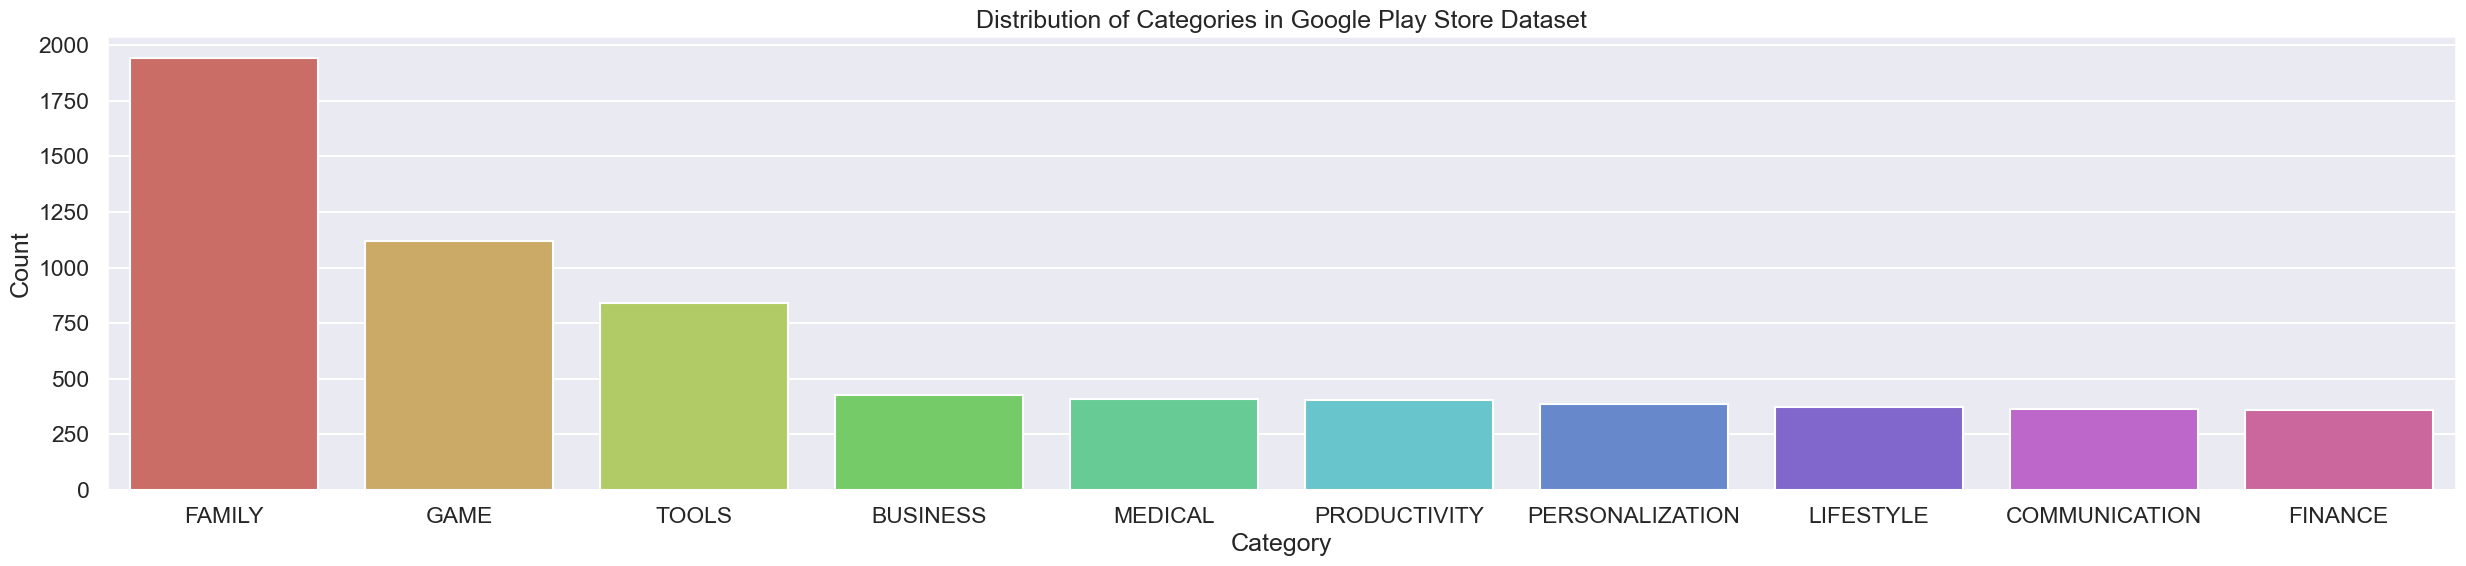

In [125]:
Category_Count = pd.DataFrame({'Category': Google_PlayStore_Dataset['Category'].value_counts().index, 'Count': Google_PlayStore_Dataset['Category'].value_counts().values})

# Plotting the seaborn barplot
plt.figure(figsize=(25, 6))  # Adjust the figure size as needed
sns.barplot(x='Category', y='Count',data=Category_Count[:10], palette="hls")
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories in Google Play Store Dataset')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

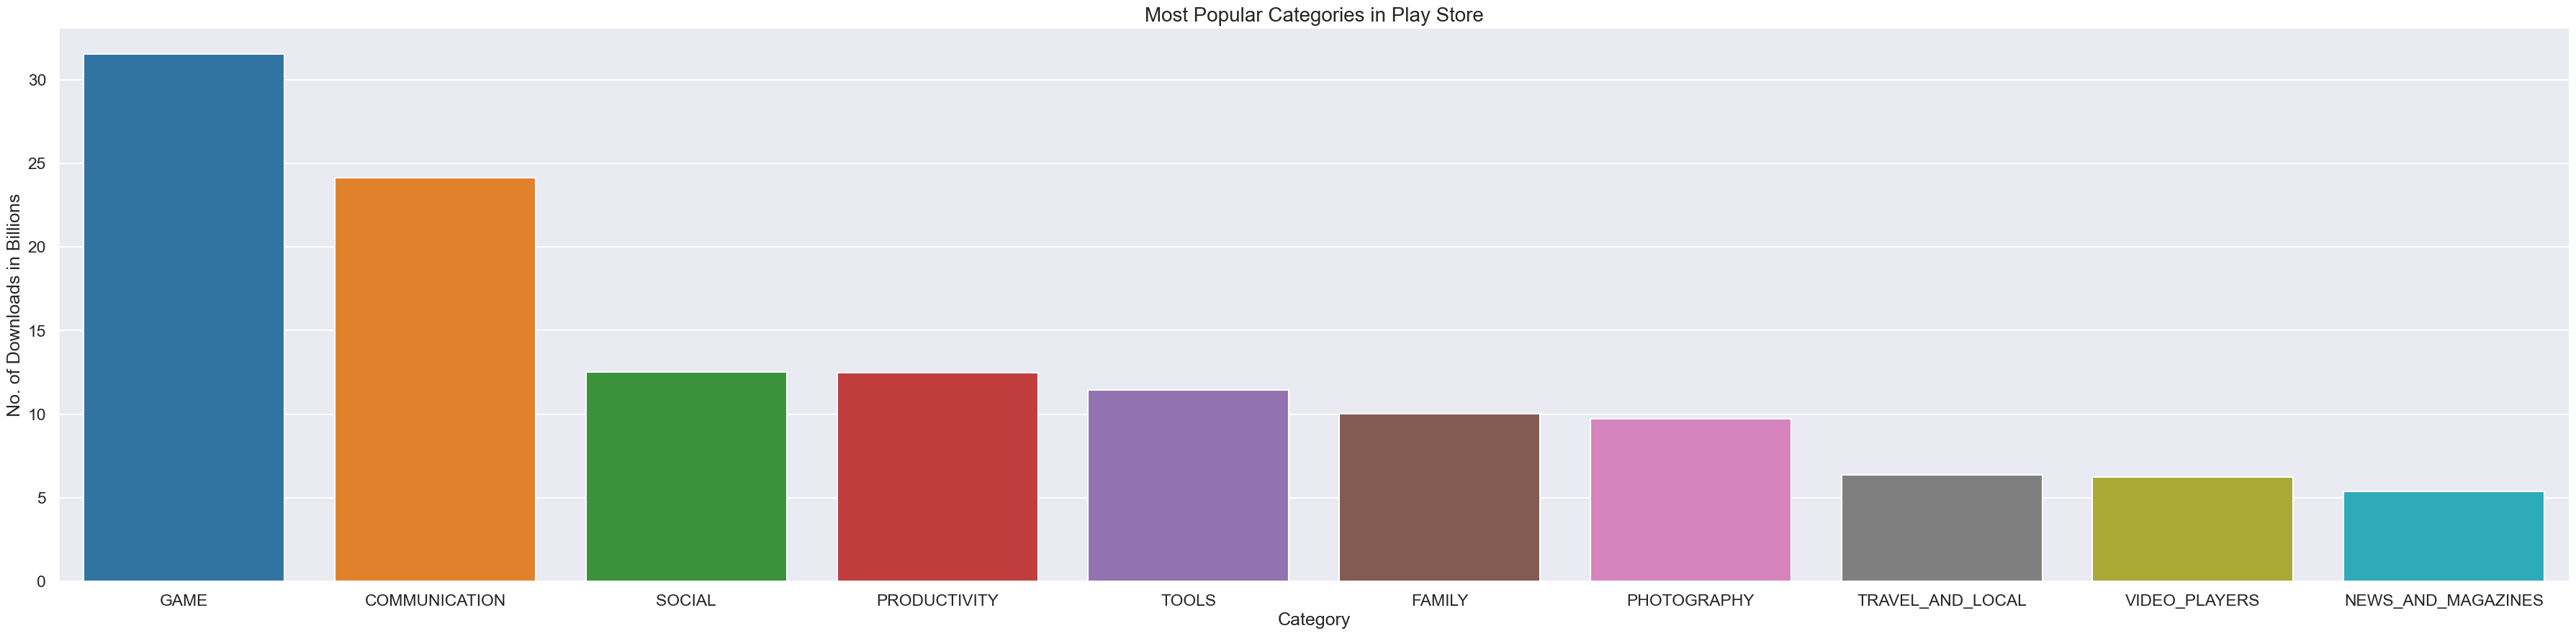

In [126]:
Category_Downloads = Google_PlayStore_Dataset.groupby(['Category'])['Downloads'].sum().sort_values(ascending = False).reset_index()
Category_Downloads.Downloads = Category_Downloads.Downloads/1000000000

plt.figure(figsize = (45,10))
sns.set_context("talk")
sns.set_style("darkgrid")
ax = sns.barplot(x = 'Category', y = 'Downloads' , data = Category_Downloads[:10] )
ax.set_ylabel('No. of Downloads in Billions')
ax.set_xlabel('Category')
ax.set_title("Most Popular Categories in Play Store", size = 20)

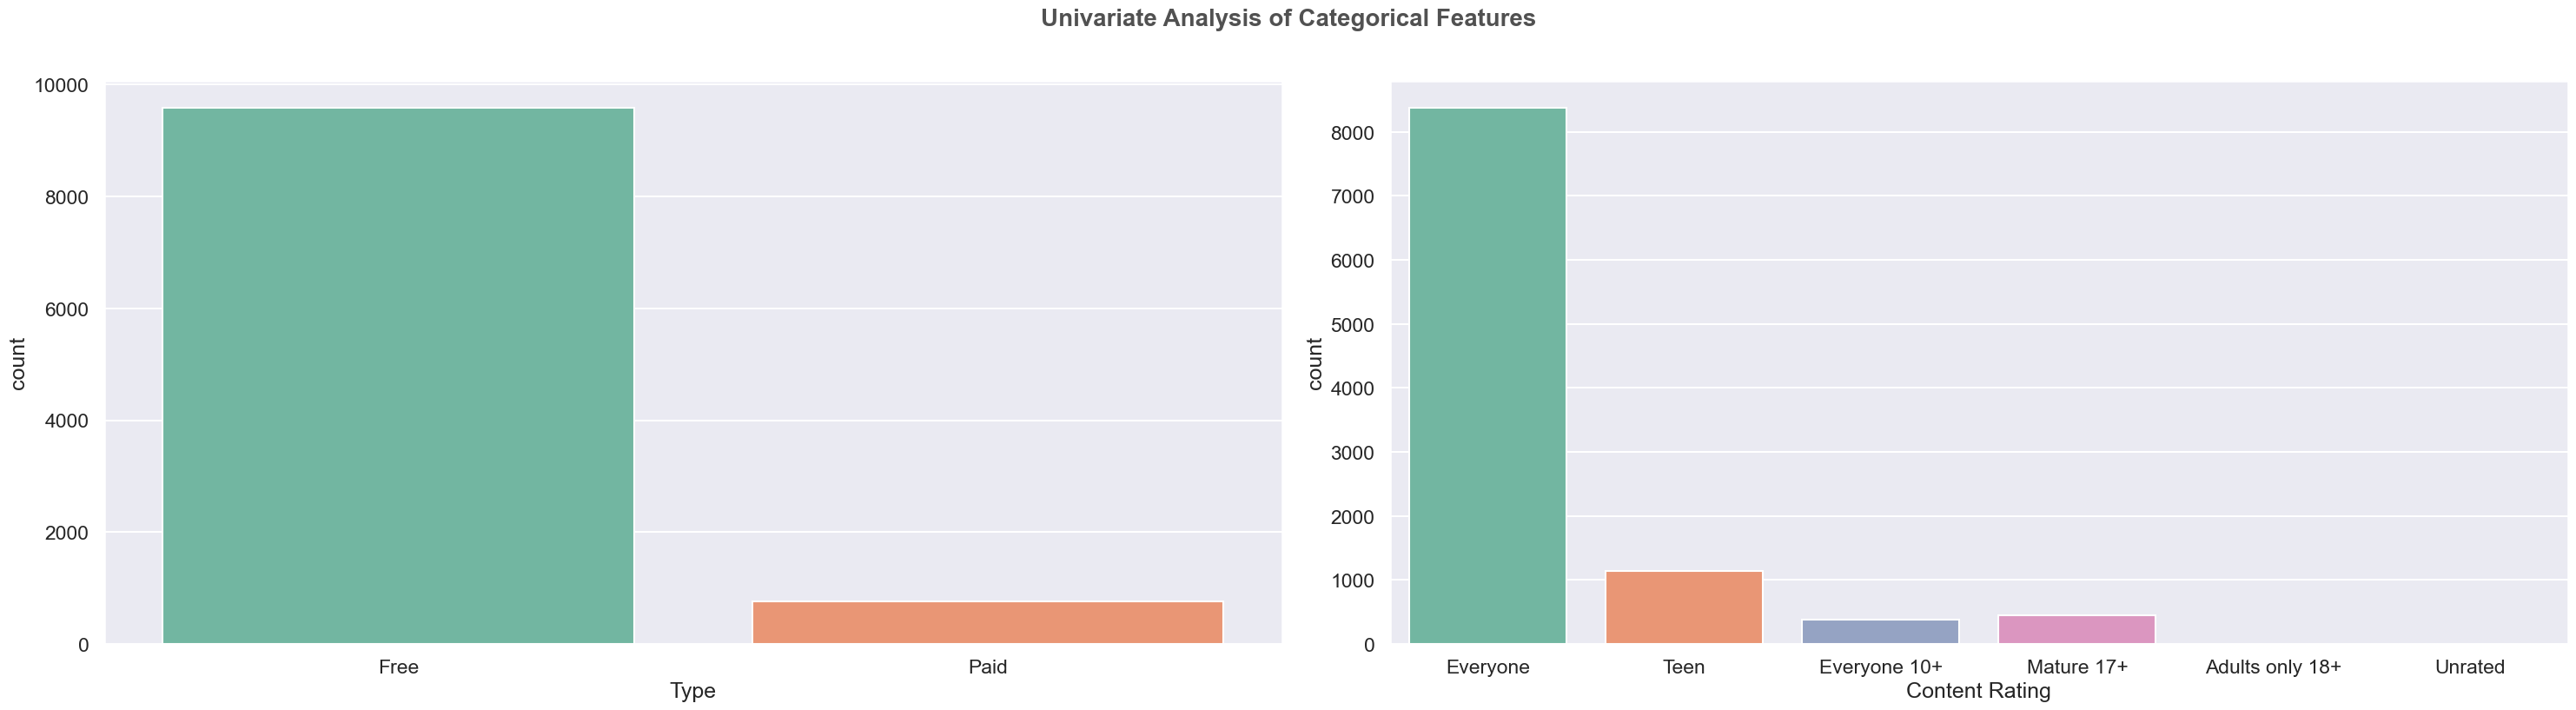

In [127]:
# categorical columns
plt.figure(figsize=(30, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=Google_PlayStore_Dataset[category[i]],palette="Set2")
    plt.xlabel(category[i]) 
    plt.tight_layout()

##########################################################################################################################################################################################################################################################################################################################

### **$$Assignment\ Question\ :-$$**

**`Q.N0-09`    Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?**

**Ans :-**

In [128]:
# import pandas as pd

## Load the dataset 
# Flight_Price_Dataset = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

## Display top 5 Rows os the Dataset
display(Google_PlayStore_Dataset.head())

# Print the dimensions
print(f"\nRows of the dataset - {Google_PlayStore_Dataset.shape[0]} \nColumns of the dataset - {Google_PlayStore_Dataset.shape[1]}")

,App,Category,Rating,Reviews,Size (In MB),Downloads,Type,Price (In US Dollar),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up



Rows of the dataset - 10357 
Columns of the dataset - 13


-----------------------------------------------------------------------------------------------------------------------------------------------------

**`Q.No-10`    How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.**

**Ans :-**

In [129]:
# Filter out rows with missing ratings
Google_PlayStore_Dataset = Google_PlayStore_Dataset.dropna(subset=['Rating'])

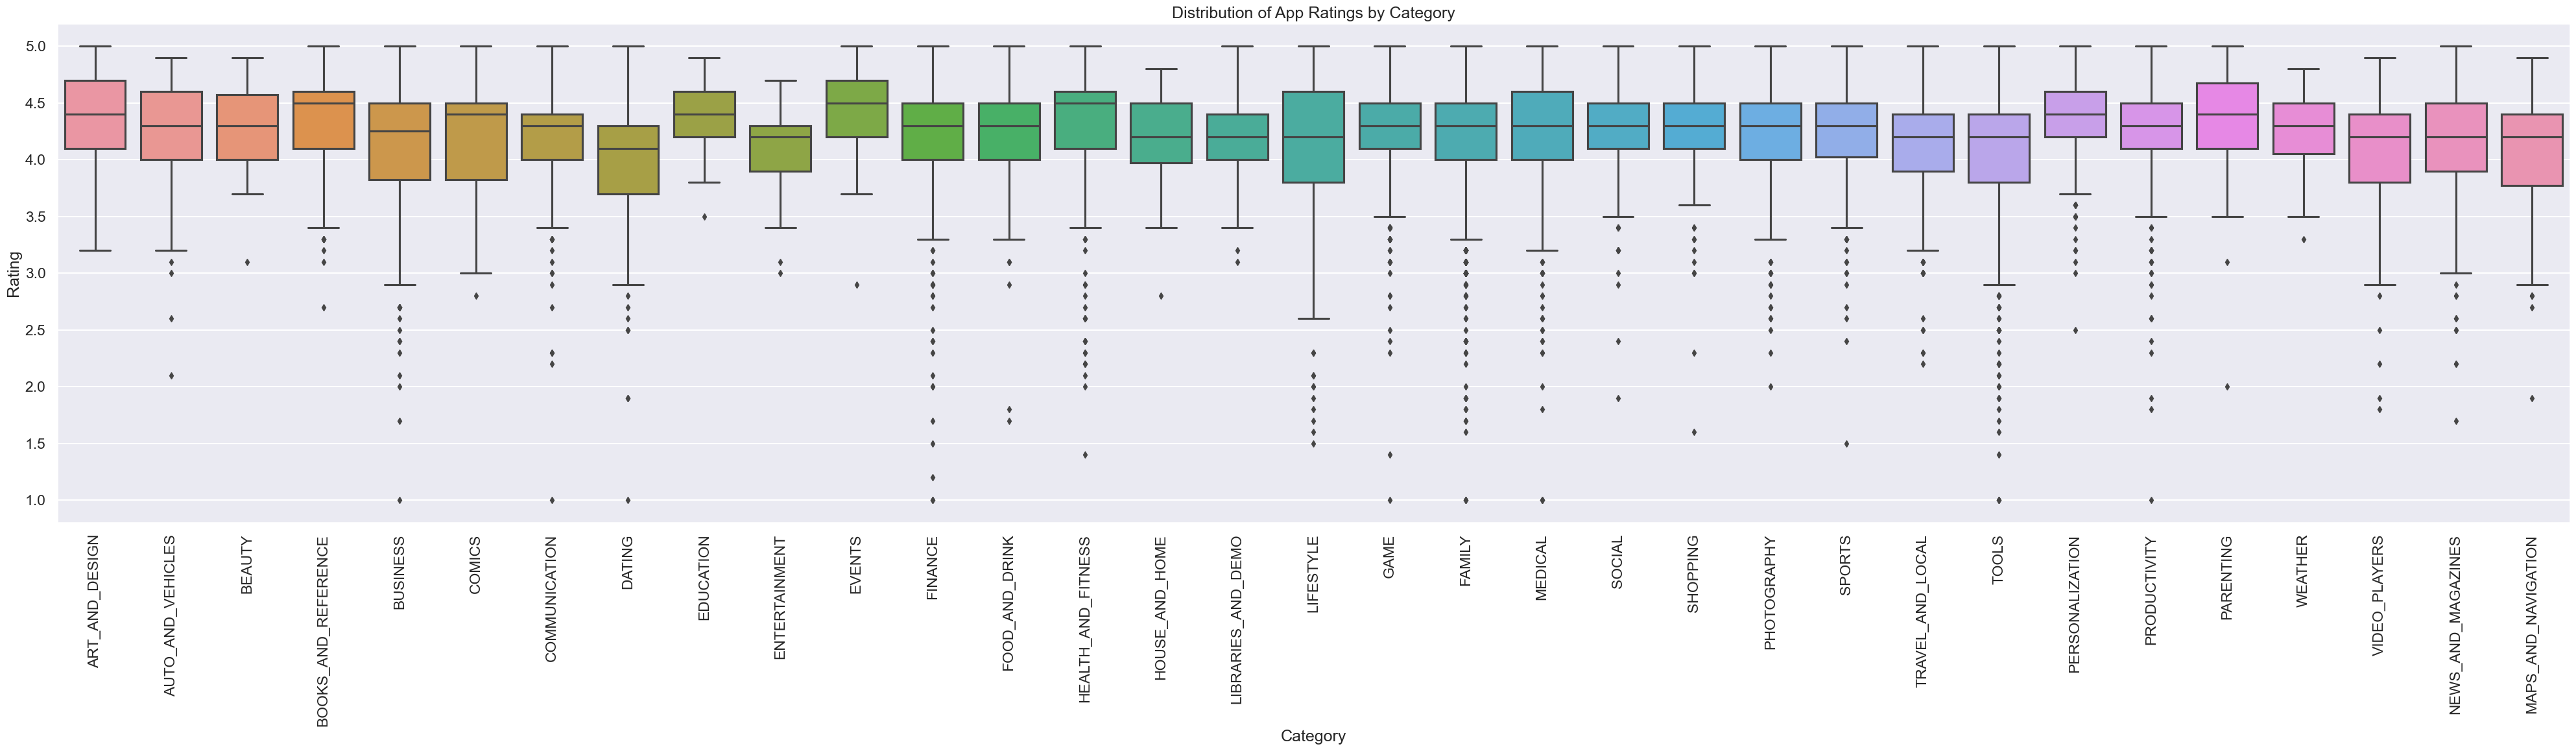

In [130]:
# Create boxplot using seaborn
plt.figure(figsize=(50, 10))
sns.boxplot(x='Category', y='Rating', data=Google_PlayStore_Dataset)
plt.xticks(rotation=90) 
plt.title('Distribution of App Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

-------------------------------------------------------------------------------------------------------------------------------------------------------

**`Q.No-11`    Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.**

**Ans :-**

In [131]:
Google_PlayStore_Dataset_missing_value

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**`Yes, there are missing values in the dataset`. Based on the information we gain after calculation :**

- **Rating -** There are 1474 missing values in the "Rating" column. Missing ratings could impact any analysis that involves evaluating or comparing the quality or popularity of apps. Depending on the nature of your analysis, you might choose to either remove rows with missing ratings or impute the missing values using techniques such as mean, median, or mode imputation.

- **Type -** There is 1 missing value in the "Type" column. This column likely indicates whether the app is free or paid. The impact of this missing value depends on the importance of distinguishing between free and paid apps in your analysis. You might consider filling the missing value with the most common type (mode) or dropping the row if it doesn't significantly affect your analysis.

- **Content Rating -** There is 1 missing value in the "Content Rating" column. This column typically indicates the target audience age group for the app (e.g., Everyone, Teen, Mature). The impact of this missing value depends on how important content rating is to your analysis. You might choose to fill it with the mode or drop the row if it's not crucial for your analysis.

- **Current Ver & Android Ver -** There are 8 and 3 missing values in the "Current Ver" and "Android Ver" columns, respectively. These columns provide information about the current version of the app and the required Android version. The impact of these missing values depends on whether you intend to analyze app versions or compatibility with specific Android versions. If not crucial, you might opt to drop these rows.

**Handling missing values is a critical step in data preprocessing to ensure the reliability and accuracy of our analysis. The approach we take to address missing values should align with the objectives of our analysis and the specific requirements of the dataset.**

-------------------------------------------------------------------------------------------------------------------------------------------------------

**`Q.No-12`    What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.**

**Ans :-**

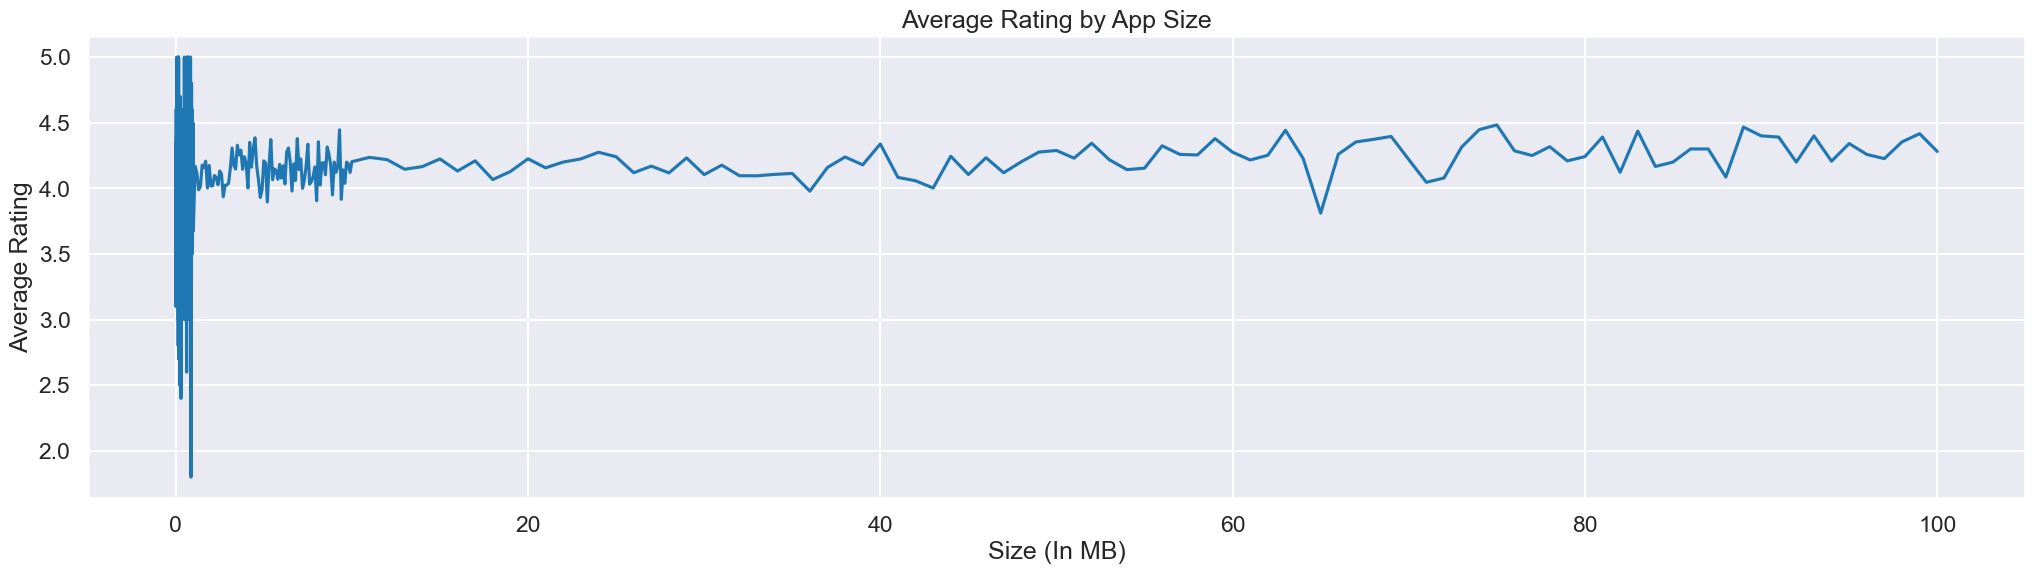

In [132]:
avg_rating_by_size = Google_PlayStore_Dataset.groupby('Size (In MB)')['Rating'].mean()

plt.figure(figsize=(25, 6))
avg_rating_by_size.plot()
plt.title('Average Rating by App Size')
plt.xlabel('Size (In MB)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

**The size of a mobile application influences its user rating. Smaller apps, occupying less storage space on devices, are hypothesized to receive higher ratings compared to larger apps. This is postulated due to the potential advantages smaller apps offer, such as faster download times, reduced storage consumption, and potentially more focused functionalities.**

`Conversely`, **larger apps might incur longer download times and higher storage requirements, potentially leading to lower user satisfaction and ratings.**

--------------------------------------------------------------------------------------------------------------------------------------------------------

**`Q.No-13`    How does the type of app affect its price? Create a bar chart to compare average prices by app type.**

**Ans :-**

In [133]:
average_prices = Google_PlayStore_Dataset.groupby('Category')['Price (In US Dollar)'].mean()
display(average_prices)

Category
ART_AND_DESIGN         0.096290
AUTO_AND_VEHICLES      0.027260
BEAUTY                 0.000000
BOOKS_AND_REFERENCE    0.134915
BUSINESS               0.238556
COMICS                 0.000000
COMMUNICATION          0.184658
DATING                 0.144403
EDUCATION              0.139225
ENTERTAINMENT          0.071892
EVENTS                 0.000000
FAMILY                 1.328743
FINANCE                7.696751
FOOD_AND_DRINK         0.080000
GAME                   0.261043
HEALTH_AND_FITNESS     0.161794
HOUSE_AND_HOME         0.000000
LIBRARIES_AND_DEMO     0.000000
LIFESTYLE              6.429115
MAPS_AND_NAVIGATION    0.217339
MEDICAL                2.148543
NEWS_AND_MAGAZINES     0.018598
PARENTING              0.191600
PERSONALIZATION        0.404097
PHOTOGRAPHY            0.250855
PRODUCTIVITY           0.212335
SHOPPING               0.027129
SOCIAL                 0.008115
SPORTS                 0.325909
TOOLS                  0.283243
TRAVEL_AND_LOCAL       0.182878

**`Based on the outcome of the average price of every app type` :**

1. **Category with Low or No Prices**: Categories such as 'BEAUTY', 'COMICS', 'EVENTS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', and 'NEWS_AND_MAGAZINES' tend to have very low or no prices on average. This might indicate that apps in these categories often rely on alternative revenue models such as ads or in-app purchases rather than upfront pricing.

2. **Categories with Moderate Prices**: Categories like 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BOOKS_AND_REFERENCE', 'EDUCATION', 'ENTERTAINMENT', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'MAPS_AND_NAVIGATION', 'PARENTING', 'PHOTOGRAPHY', 'PRODUCTIVITY', 'TRAVEL_AND_LOCAL', and 'VIDEO_PLAYERS' have moderate average prices. This suggests that users might be willing to pay a reasonable amount for apps in these categories, perhaps for premium features or content.

3. **Categories with Higher Prices**: Categories such as 'BUSINESS', 'FAMILY', 'FINANCE', 'LIFESTYLE', 'MEDICAL', 'PERSONALIZATION', 'SHOPPING', 'SPORTS', 'TOOLS', 'WEATHER' tend to have higher average prices. This could indicate that apps in these categories often provide specialized or professional services, which users are willing to pay more for.

4. **Exceptional Cases**: It's worth noting that some categories like 'BEAUTY', 'COMICS', 'EVENTS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', and 'NEWS_AND_MAGAZINES' have average prices of zero, indicating that a significant portion of apps in these categories might be offered for free.

**`Top 10 types by average price` -**

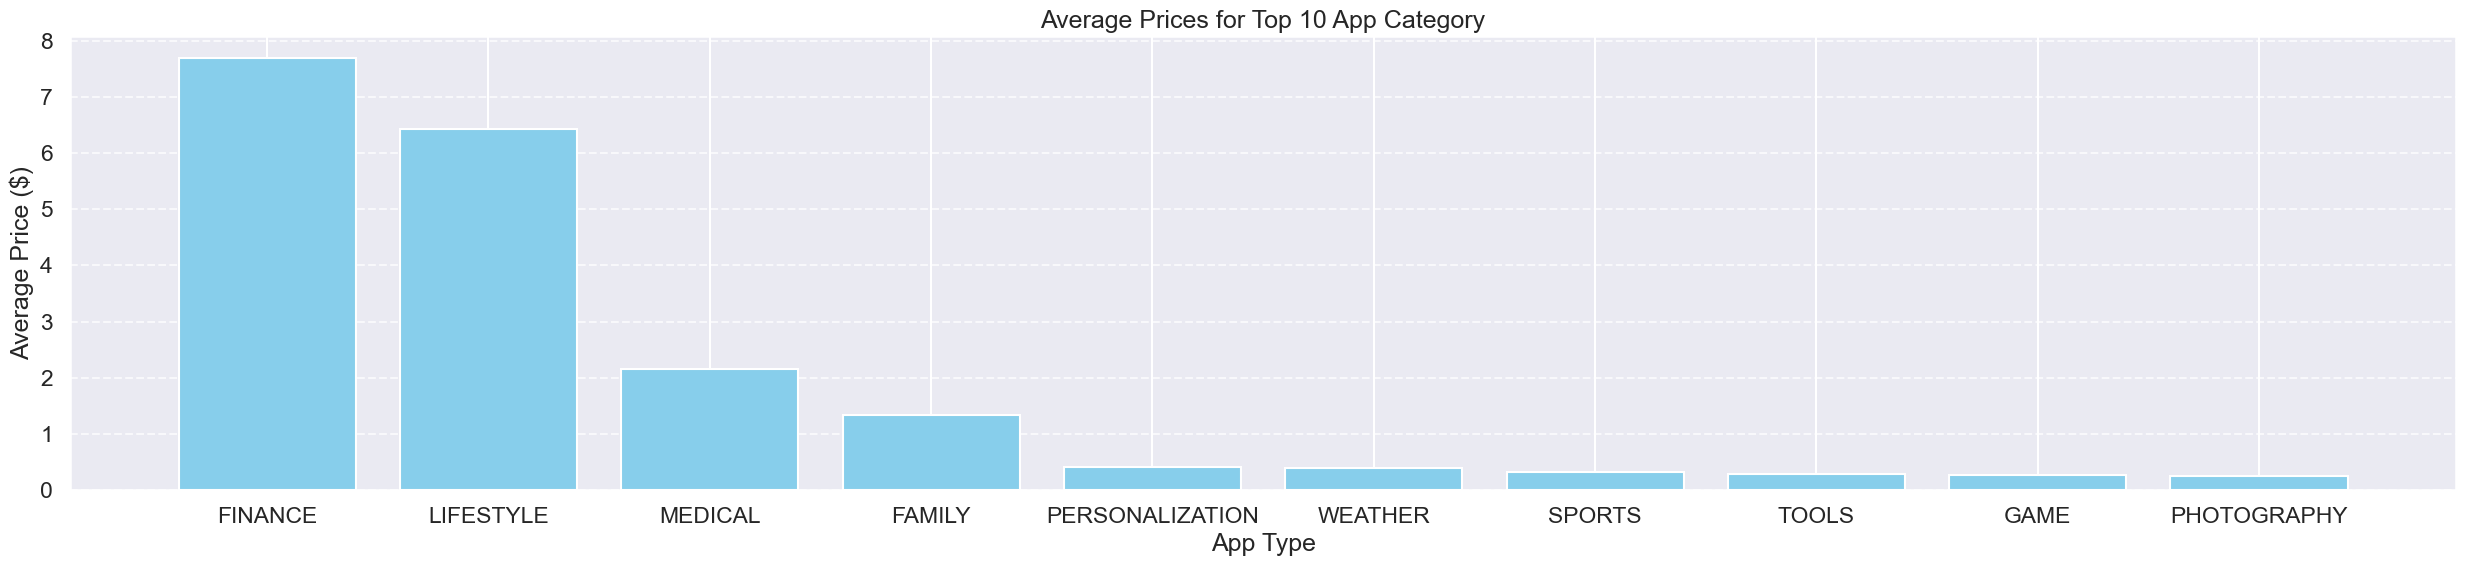

In [134]:
top_10_types = average_prices.nlargest(10)
top_10_types_df = top_10_types.reset_index()

plt.figure(figsize=(25, 6))
plt.bar(top_10_types_df['Category'], top_10_types_df['Price (In US Dollar)'], color='skyblue')
plt.title('Average Prices for Top 10 App Category')
plt.xlabel('App Type')
plt.ylabel('Average Price ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

`Overall`, **The Category of app significantly affects its price, with certain categories commanding higher prices due to the nature of the services or content they offer, while others rely on different monetization strategies such as ads or in-app purchases.**

---------------------------------------------------------------------------------------------------------------------------------------------------------------------

**`Q.No-14`    What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.**

**Ans :-**

Top 10 Most Popular Apps:
App
Subway Surfers                  5000000000
Google Photos                   4000000000
Hangouts                        4000000000
Google Chrome: Fast & Secure    3000000000
Google Drive                    3000000000
Google News                     3000000000
Instagram                       3000000000
Maps - Navigate & Explore       3000000000
Candy Crush Saga                2500000000
Temple Run 2                    2500000000
Name: Downloads, dtype: int64


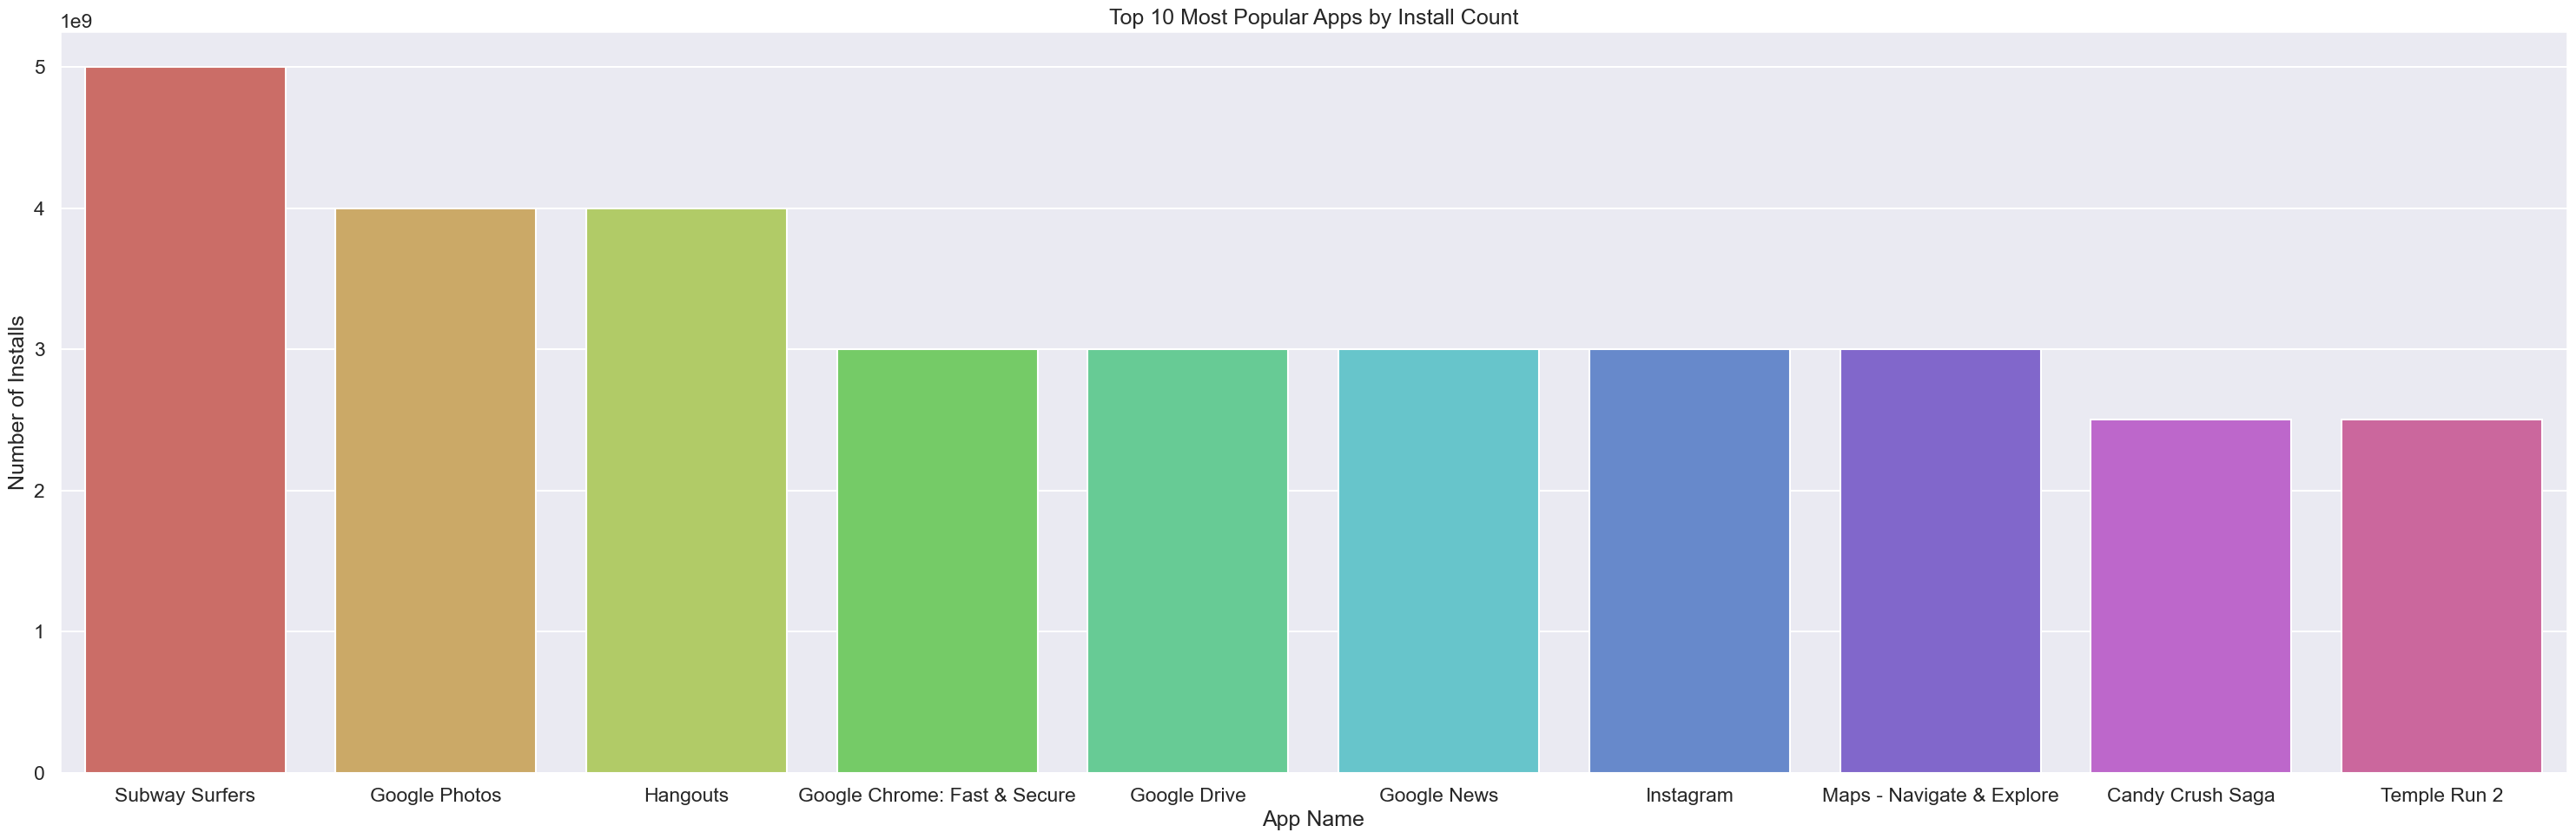

In [135]:
install_counts = Google_PlayStore_Dataset.groupby('App')['Downloads'].sum()
top_10_apps = install_counts.nlargest(10)
print("Top 10 Most Popular Apps:")
print(top_10_apps)

top_10_apps_df = top_10_apps.reset_index()

plt.figure(figsize=(30, 10))
sns.barplot(x='App', y='Downloads', data=top_10_apps_df, palette='hls')
plt.title('Top 10 Most Popular Apps by Install Count')
plt.ylabel('Number of Installs')
plt.xlabel('App Name')
plt.tight_layout()
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**`Q.No-15`    A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?**

**Ans :-**

**To assist the company in identifying the most popular app categories for launching their new app on the Google Play Store, `I would approach the task as follows` :**

In [136]:
## Overall Popularity Analysis - Total Downloads
popularity_by_downloads = Google_PlayStore_Dataset.groupby('Category')['Downloads'].sum().sort_values(ascending=False)

## Average Ratings Analysis
average_ratings = Google_PlayStore_Dataset.groupby('Category')['Rating'].mean().sort_values(ascending=False)

## Combining Metrics
combined_metrics = pd.DataFrame({
       'Total Downloads': popularity_by_downloads,
       'Average Rating': average_ratings
   })

## Identifying Top Categories
top_categories_by_downloads = popularity_by_downloads.head(5)

## Considering User Satisfaction
top_categories_with_ratings = pd.merge(top_categories_by_downloads, average_ratings, left_index=True, right_index=True)
display(top_categories_with_ratings)

,Downloads,Rating
Category,,
GAME,31543862717,4.281285
COMMUNICATION,24152241530,4.151466
SOCIAL,12513841475,4.254918
PRODUCTIVITY,12463070180,4.201796
TOOLS,11450724500,4.047411


**Based on the Outcome data showing the top app categories by downloads along with their average ratings, `I would recommend the following insights to the company` :**

1. **Focus on Popular Categories:** The top categories by downloads are "GAME," "COMMUNICATION," "SOCIAL," "PRODUCTIVITY," and "TOOLS." These categories have a significant number of downloads, indicating high market demand.

2. **Consider User Satisfaction:** While "GAME" has the highest number of downloads, other categories such as "SOCIAL" and "PRODUCTIVITY" also have high average ratings. This suggests that users are satisfied with apps in these categories.

3. **Opportunities for Improvement:** Although "TOOLS" has a high number of downloads, its average rating is relatively lower compared to other top categories. This indicates potential areas for improvement in terms of user satisfaction and app quality within the "TOOLS" category.

4. **Competitive Landscape:** The company should conduct further analysis to understand the competition and market trends within each category. This could involve researching competitor apps, identifying gaps in the market, and formulating a differentiation strategy.

5. **Target Audience Consideration:** Understanding the target audience and their preferences within each category is essential for successful app development and marketing. The company should analyze demographic data, user reviews, and user behavior to tailor the new app to meet the needs of the target audience effectively.

**`Based on these insights`, the company can make informed decisions about which app category to target for launching their new app on the Google Play Store. Additionally, they can use these recommendations to develop a strategic plan for app development, marketing, and differentiation within the chosen category.**

-------------------------------------------------------------------------------------------------------------------------------------------------------

**`Q.No-16`    A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?**

**Ans :-**

**To identify the most successful app developers in the Google Play Store dataset, we can analyze various features that indicate developer success.**

**`Here are some key features to consider` :**

1. **Number of Installs**: This indicates the popularity of an app. Higher installs generally suggest a more successful app.

   Data Visualization: Bar chart or pie chart showing the distribution of apps based on the number of installs (e.g., number of apps with 1 million+ installs, 500k-1 million installs, etc.).

2. **Ratings and Reviews**: Higher ratings and a larger number of positive reviews often indicate user satisfaction and engagement.

   Data Visualization: Scatter plot showing the correlation between ratings and the number of reviews. You can also use a histogram to visualize the distribution of ratings.

3. **App Category**: Certain categories may have higher demand and thus more successful developers.

   Data Visualization: Stacked bar chart showing the distribution of apps across different categories.

4. **Revenue**: Analyze in-app purchases, ads revenue, or app purchase price to determine the financial success of developers.

   Data Visualization: Box plot or violin plot showing the distribution of revenue across different developers or categories. You can also use a line graph to show revenue trends over time.

5. **Retention Rate**: Measure how many users continue to use the app over time.

   Data Visualization: Line graph showing the retention rate over time for different apps.

6. **Frequency of Updates**: Developers who frequently update their apps often provide better user experiences and support.

   Data Visualization: Histogram showing the distribution of update frequencies for different developers.

7. **App Size**: App size can affect download and installation rates. Smaller apps may be preferred by users.

   Data Visualization: Box plot or histogram showing the distribution of app sizes.

8. **Country-wise Analysis**: Analyzing the popularity of apps in different countries can help identify global success.

   Data Visualization: World map or bar chart showing the distribution of installs or revenue across different countries.

9. **User Demographics**: Understanding the demographics of app users can help tailor marketing strategies.

   Data Visualization: Pie charts or bar charts showing the age, gender, and other demographic information of app users.

**`By analyzing these features and presenting the findings through appropriate data visualizations`, the mobile app development company can identify successful app developers and make informed decisions about potential partnerships or investment opportunities.**

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**`Q.No-17`    A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?**

**Ans :-**

**To recommend the best time to launch a new app on the Google Play Store, you would want to analyze various features of the dataset to understand user behavior, competition, and market trends.**

**`Here are some features` :**

1. **App Category Trends**: Analyze the popularity of different app categories over time. This can help identify which categories are currently trending and have high demand.

   Data Visualization: A line chart showing the number of apps added to each category over time, or a bar chart showing the distribution of apps across categories.

2. **User Ratings and Reviews**: Investigate the average ratings and sentiment of apps in different categories over time. Higher ratings and positive reviews indicate user satisfaction and could suggest a good time to launch a new app.

   Data Visualization: A box plot or violin plot showing the distribution of ratings for different categories, or a sentiment analysis chart showing the sentiment score over time.

3. **Seasonality**: Look for seasonal trends in app downloads and usage. Certain categories may experience increased activity during specific seasons or events.

   Data Visualization: A heatmap or line chart showing app downloads or usage over time, with annotations for seasonal events.

4. **Competitor Analysis**: Analyze the performance of top competitors in the same category to understand their launch timings and user engagement patterns.

   Data Visualization: A comparison chart or radar chart showing key metrics (e.g., ratings, downloads, reviews) for the top competitors in the chosen category.

5. **Price Sensitivity**: Investigate whether there's a correlation between app pricing and user adoption. Analyze the pricing strategies of similar apps and their impact on downloads.

   Data Visualization: A scatter plot showing the relationship between app price and number of downloads, with regression lines for different categories.

6. **App Size and Performance**: Assess the impact of app size and performance on user adoption. Users may prefer smaller apps with faster performance.

   Data Visualization: A scatter plot or bubble chart showing app size vs. average rating, with bubble size indicating the number of downloads.

7. **User Demographics**: Understand the demographics of the target audience for the new app and analyze their preferences and behavior on the Google Play Store.

   Data Visualization: Segmented bar charts or pie charts showing the distribution of app usage among different demographic groups.

**`By analyzing these features and visualizing the data accordingly`, the marketing research firm can provide valuable insights into the best time to launch a new app on the Google Play Store, considering market trends, user behavior, and competition.**